# Caso de estudio 4
### Alexa Coll, Fabiola Diaz, Valerie Espinoza y Raquel Mora


Run these commands in google colab if there's a problem with the package
```
!pip install prince
!pip install umap-learn
```


In [ ]:
!pip install prince
!pip install umap-learn

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon
import Paquete as P
from Paquete import EDA as E
from Paquete import NoSupervisado as N
from Paquete import Supervisado as S
from Paquete import Regresion as R

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-05-29 16:22:06.074902: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ModuleNotFoundError: No module named 'predictPy'

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 1

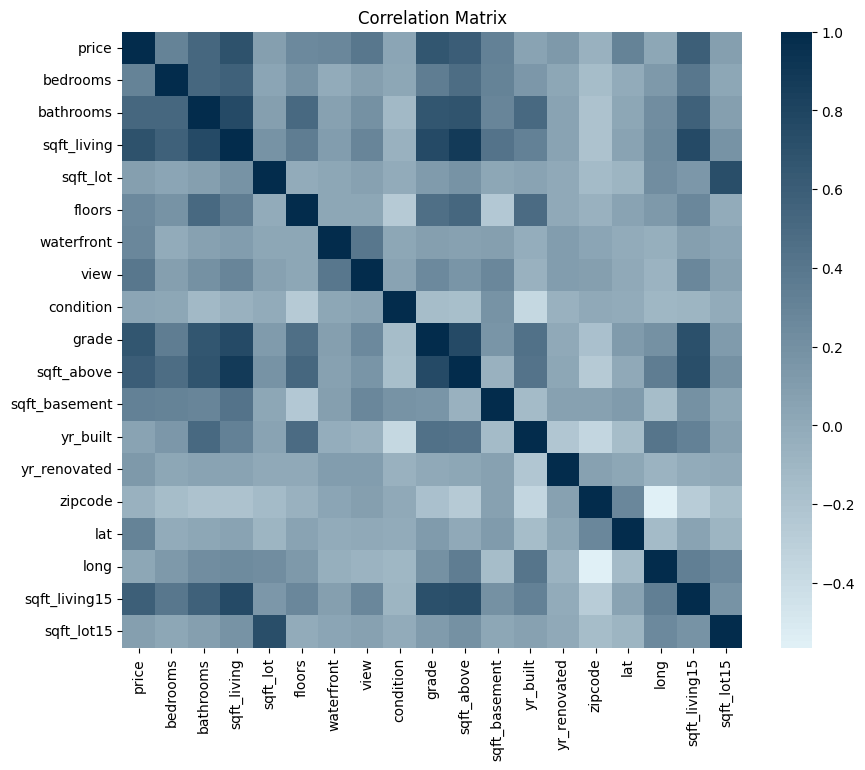

In [ ]:
p = P.AnalisisDatosExploratorio("Housing.csv")
df = p.df
p = E(df)
p.drop('date')
p.show('grade')

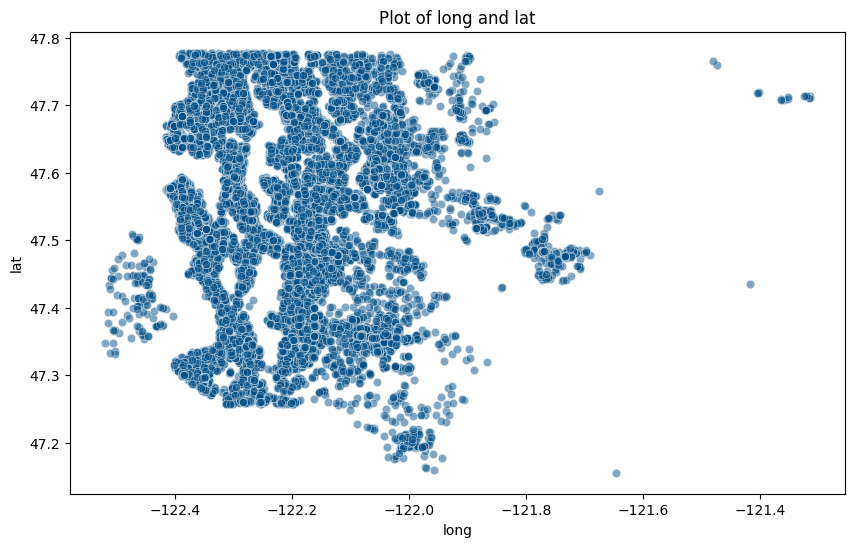

In [ ]:
p.two_variable('long', 'lat')

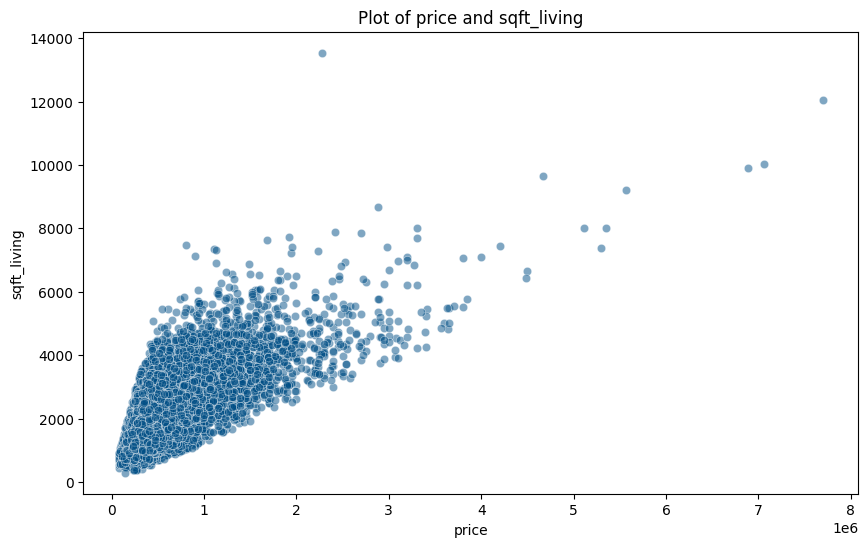

In [ ]:
p.two_variable('price', 'sqft_living')

In [ ]:
p.box('price')

In [ ]:
p.box('sqft_living')

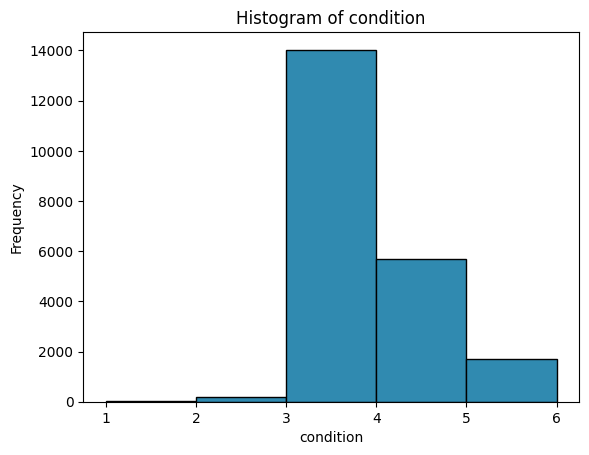

In [ ]:
p.histogram('condition')

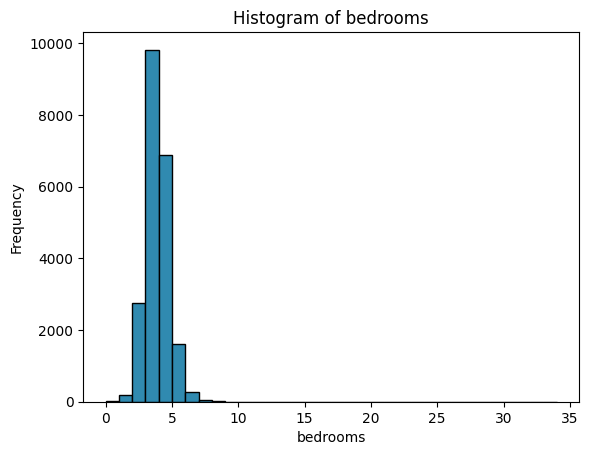

In [ ]:
p.histogram('bedrooms')

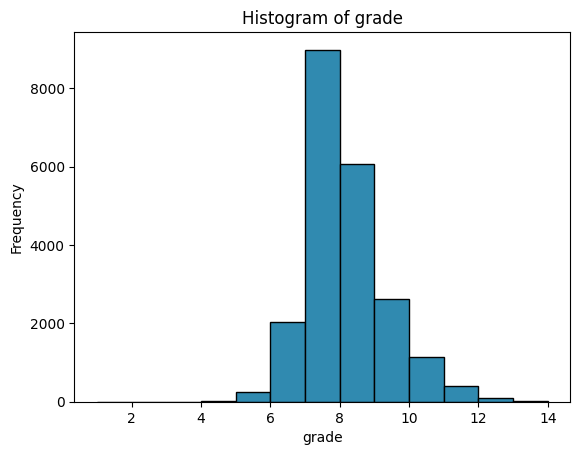

In [ ]:
p.histogram('grade')

## Clustering

We pretend to create clusters of houses based on the attributes within the dataset

### Kmeans

Silhouette Score: 0.22224530987286123


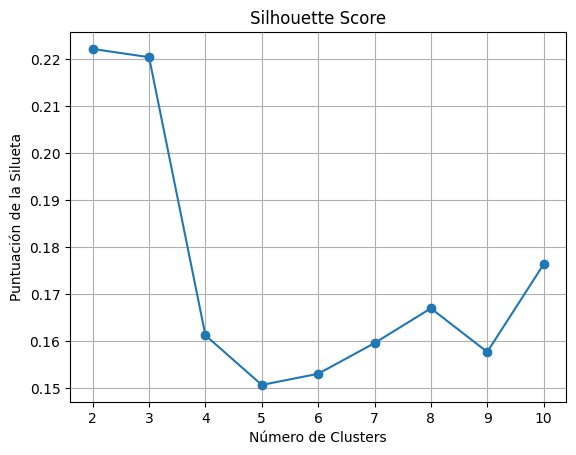

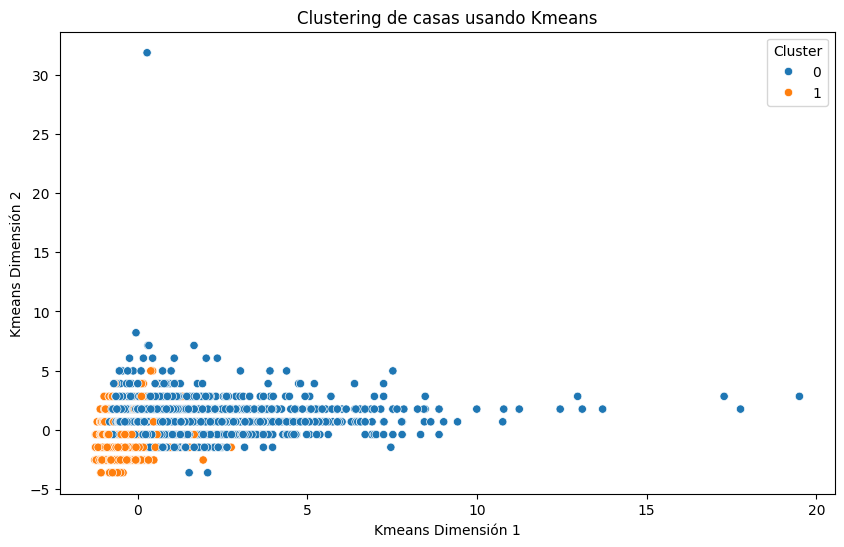

In [ ]:
p = P.AnalisisDatosExploratorio("house.csv")
p.analisisNumerico()
df = p.df
p = N(df)
p.KMeans()

### UMAP

Silhouette Score: 0.49871245


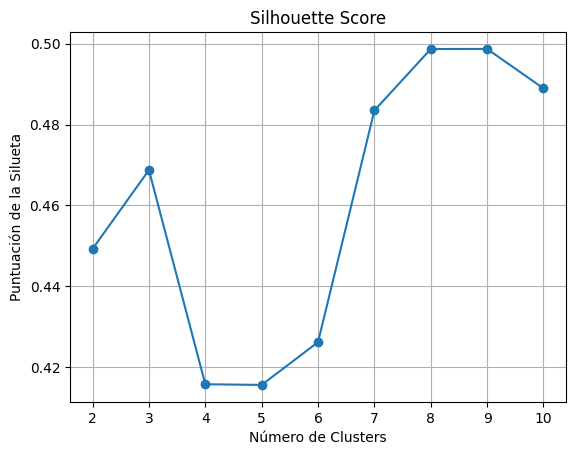

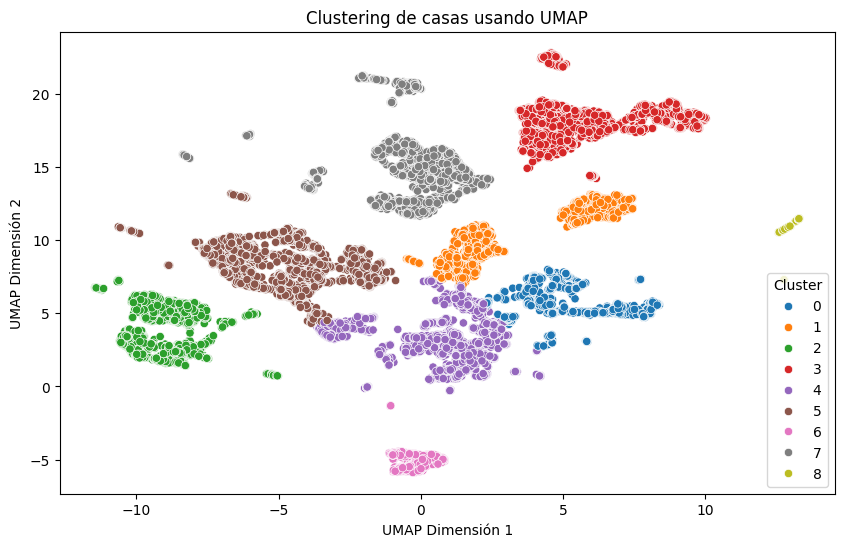

In [ ]:
p = P.AnalisisDatosExploratorio("house.csv")
p.analisisNumerico()
df = p.df
p = N(df)
p.UMAP()

### T-SNE

Silhouette Score: 0.39209086


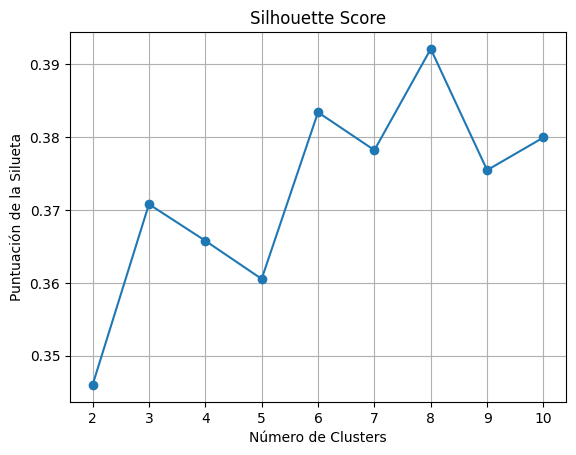

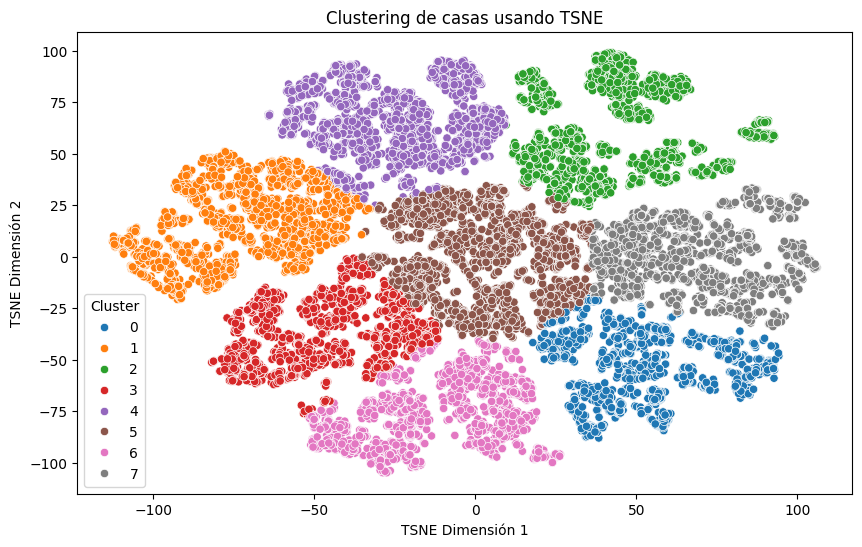

In [ ]:
p = P.AnalisisDatosExploratorio("house.csv")
p.analisisNumerico()
df = p.df
p = N(df)
p.TSNE()

### HAC

Silhouette Score: 0.1795857


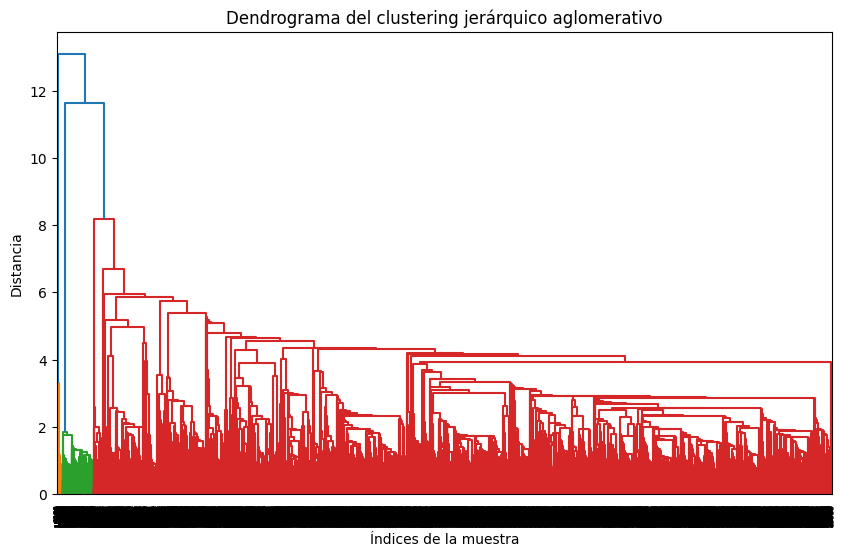

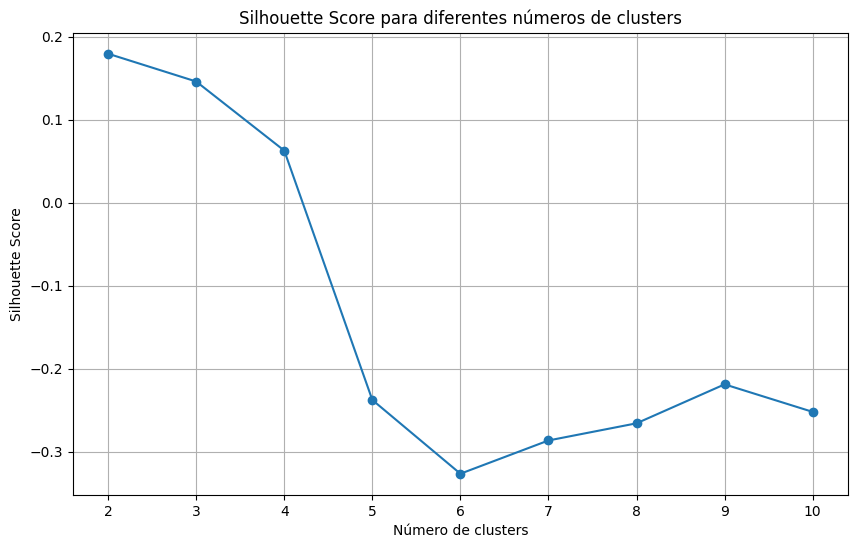

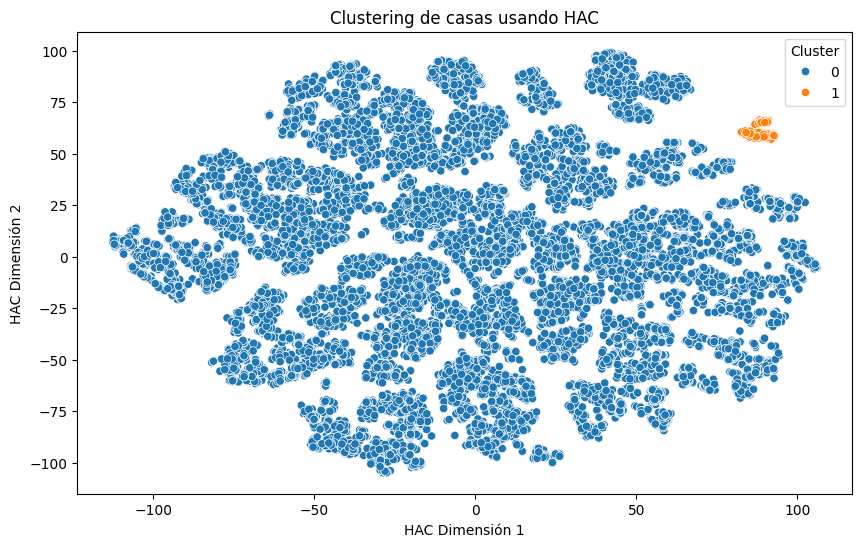

In [ ]:
p = P.AnalisisDatosExploratorio("house.csv")
p.analisisNumerico()
df = p.df
p = N(df)
p.HAC('single')

Silhouette Score: 0.35927752


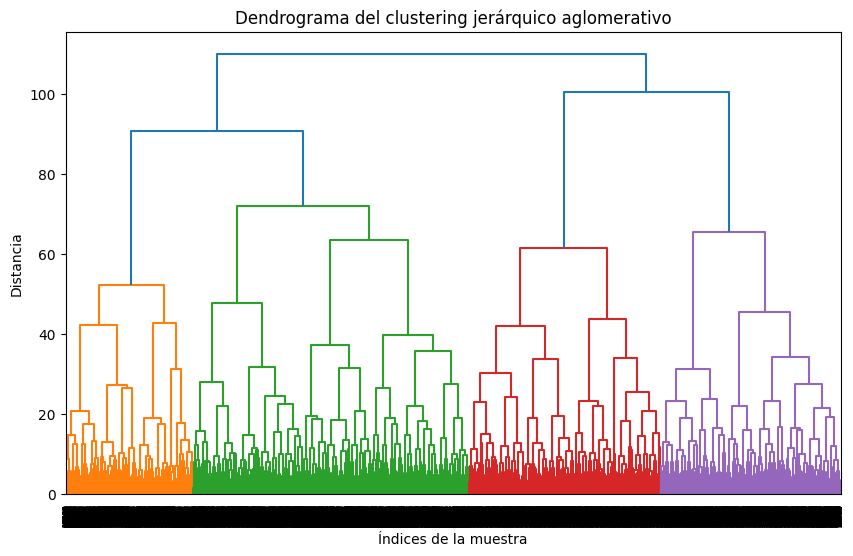

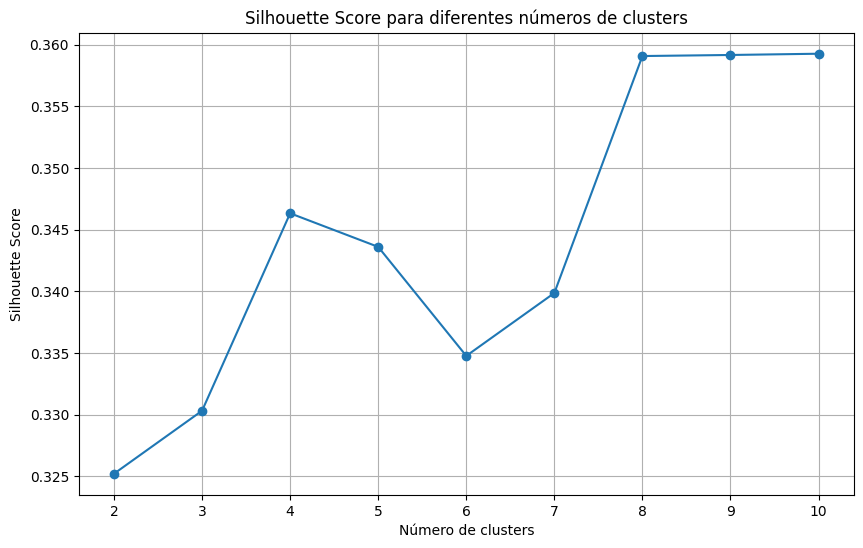

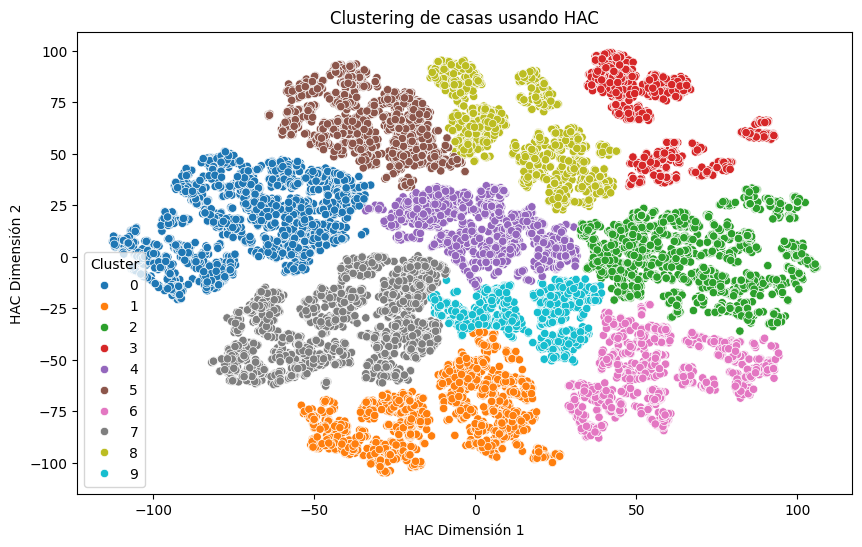

In [ ]:
p = P.AnalisisDatosExploratorio("house.csv")
p.analisisNumerico()
df = p.df
p = N(df)
p.HAC('average')

Silhouette Score: 0.33675954


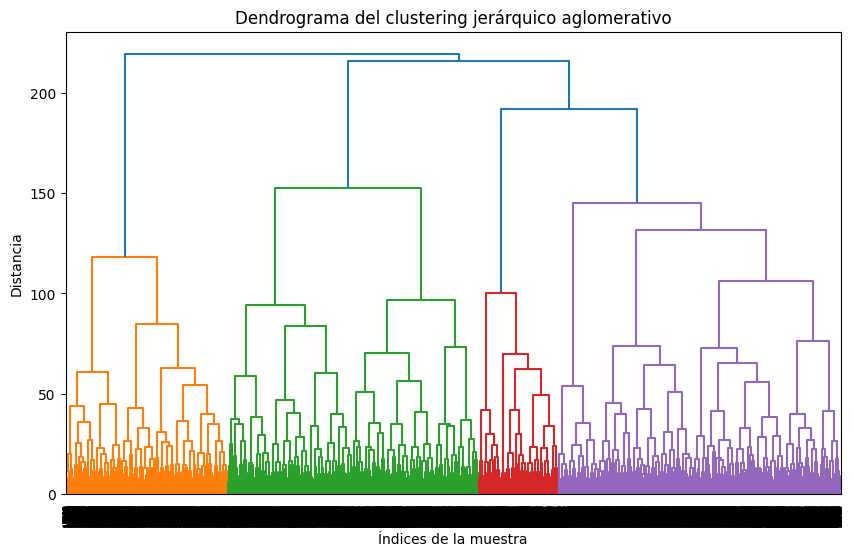

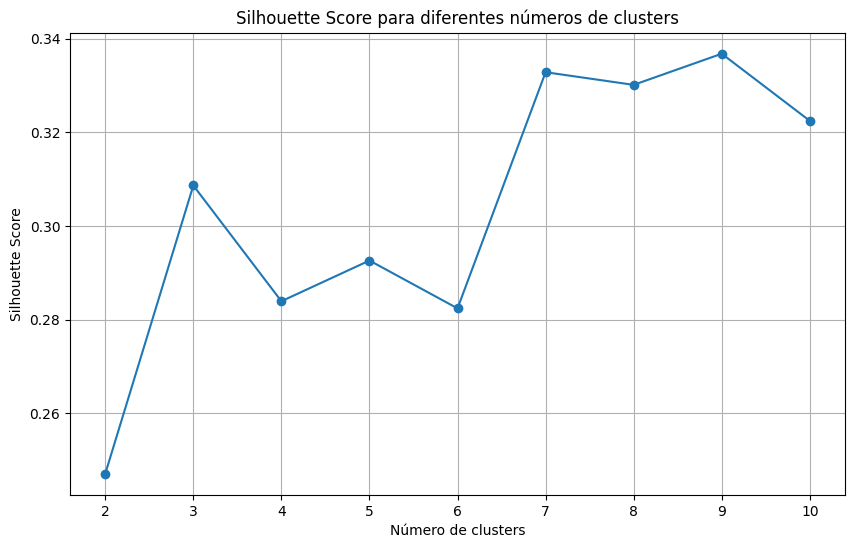

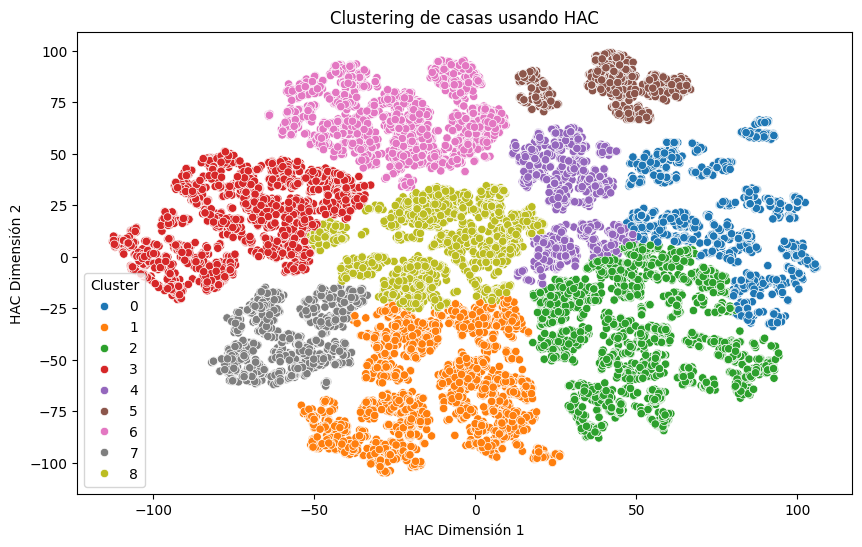

In [ ]:
p = P.AnalisisDatosExploratorio("house.csv")
p.analisisNumerico()
df = p.df
p = N(df)
p.HAC('complete')

## Benchmark
### The model that perfoms best is pre processing with UMAP and clustering utilizing Kmeas with the following metric:
* Silhouette Score: 0.498

Overall these silhouette scores are around the 0.3 mark which is not optimal however the UMAP preprocessing stands out in this particular dataset

In [ ]:
clustering = {'Algoritmo': ['Kmeans', 'UMAP','Tsne', 'HAC (single)','HAC (average)', 'HAC (complete)'],
        'Numero de Clusters': [2, 9, 8, 2, 10, 9],
        'Puntuación de la silueta': [0.222, 0.498, 0.392, 0.179, 0.359, 0.336]
        }

df = pd.DataFrame(clustering)

df

Algoritmo  Numero de Clusters  Puntuación de la silueta
0          Kmeans                   2                     0.222
1            UMAP                   9                     0.498
2            Tsne                   8                     0.392
3    HAC (single)                   2                     0.179
4   HAC (average)                  10                     0.359
5  HAC (complete)                   9                     0.336

## Hypothesis Testing (Clustering)
### Does preprocessing significantly influence the distribution of silhouette scores in clustering of houses?

In [ ]:
silhouette_scores = [0.22224530987286123, 0.49871245, 0.39209086, 0.1795857, 0.35927752, 0.33675954]

W, p_value = wilcoxon(silhouette_scores)

print("Estadístico de prueba (W):", W)
print("Valor p:", p_value)

Estadístico de prueba (W): 0.0
Valor p: 0.03125


### We reject the null hypothesis (H0) and conclude that there is evidence to support the alternative hypothesis (H1): The distribution of similarity scores before and after preprocessing, or between two different groups, is different.



---



## Classification
This classification helps to categorize properties based on their construction characteristics. Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [ ]:
p = P.AnalisisDatosExploratorio("house.csv")
p = S(p.df)
p.data_transform(0.8, 'grade')

### Decision Tree

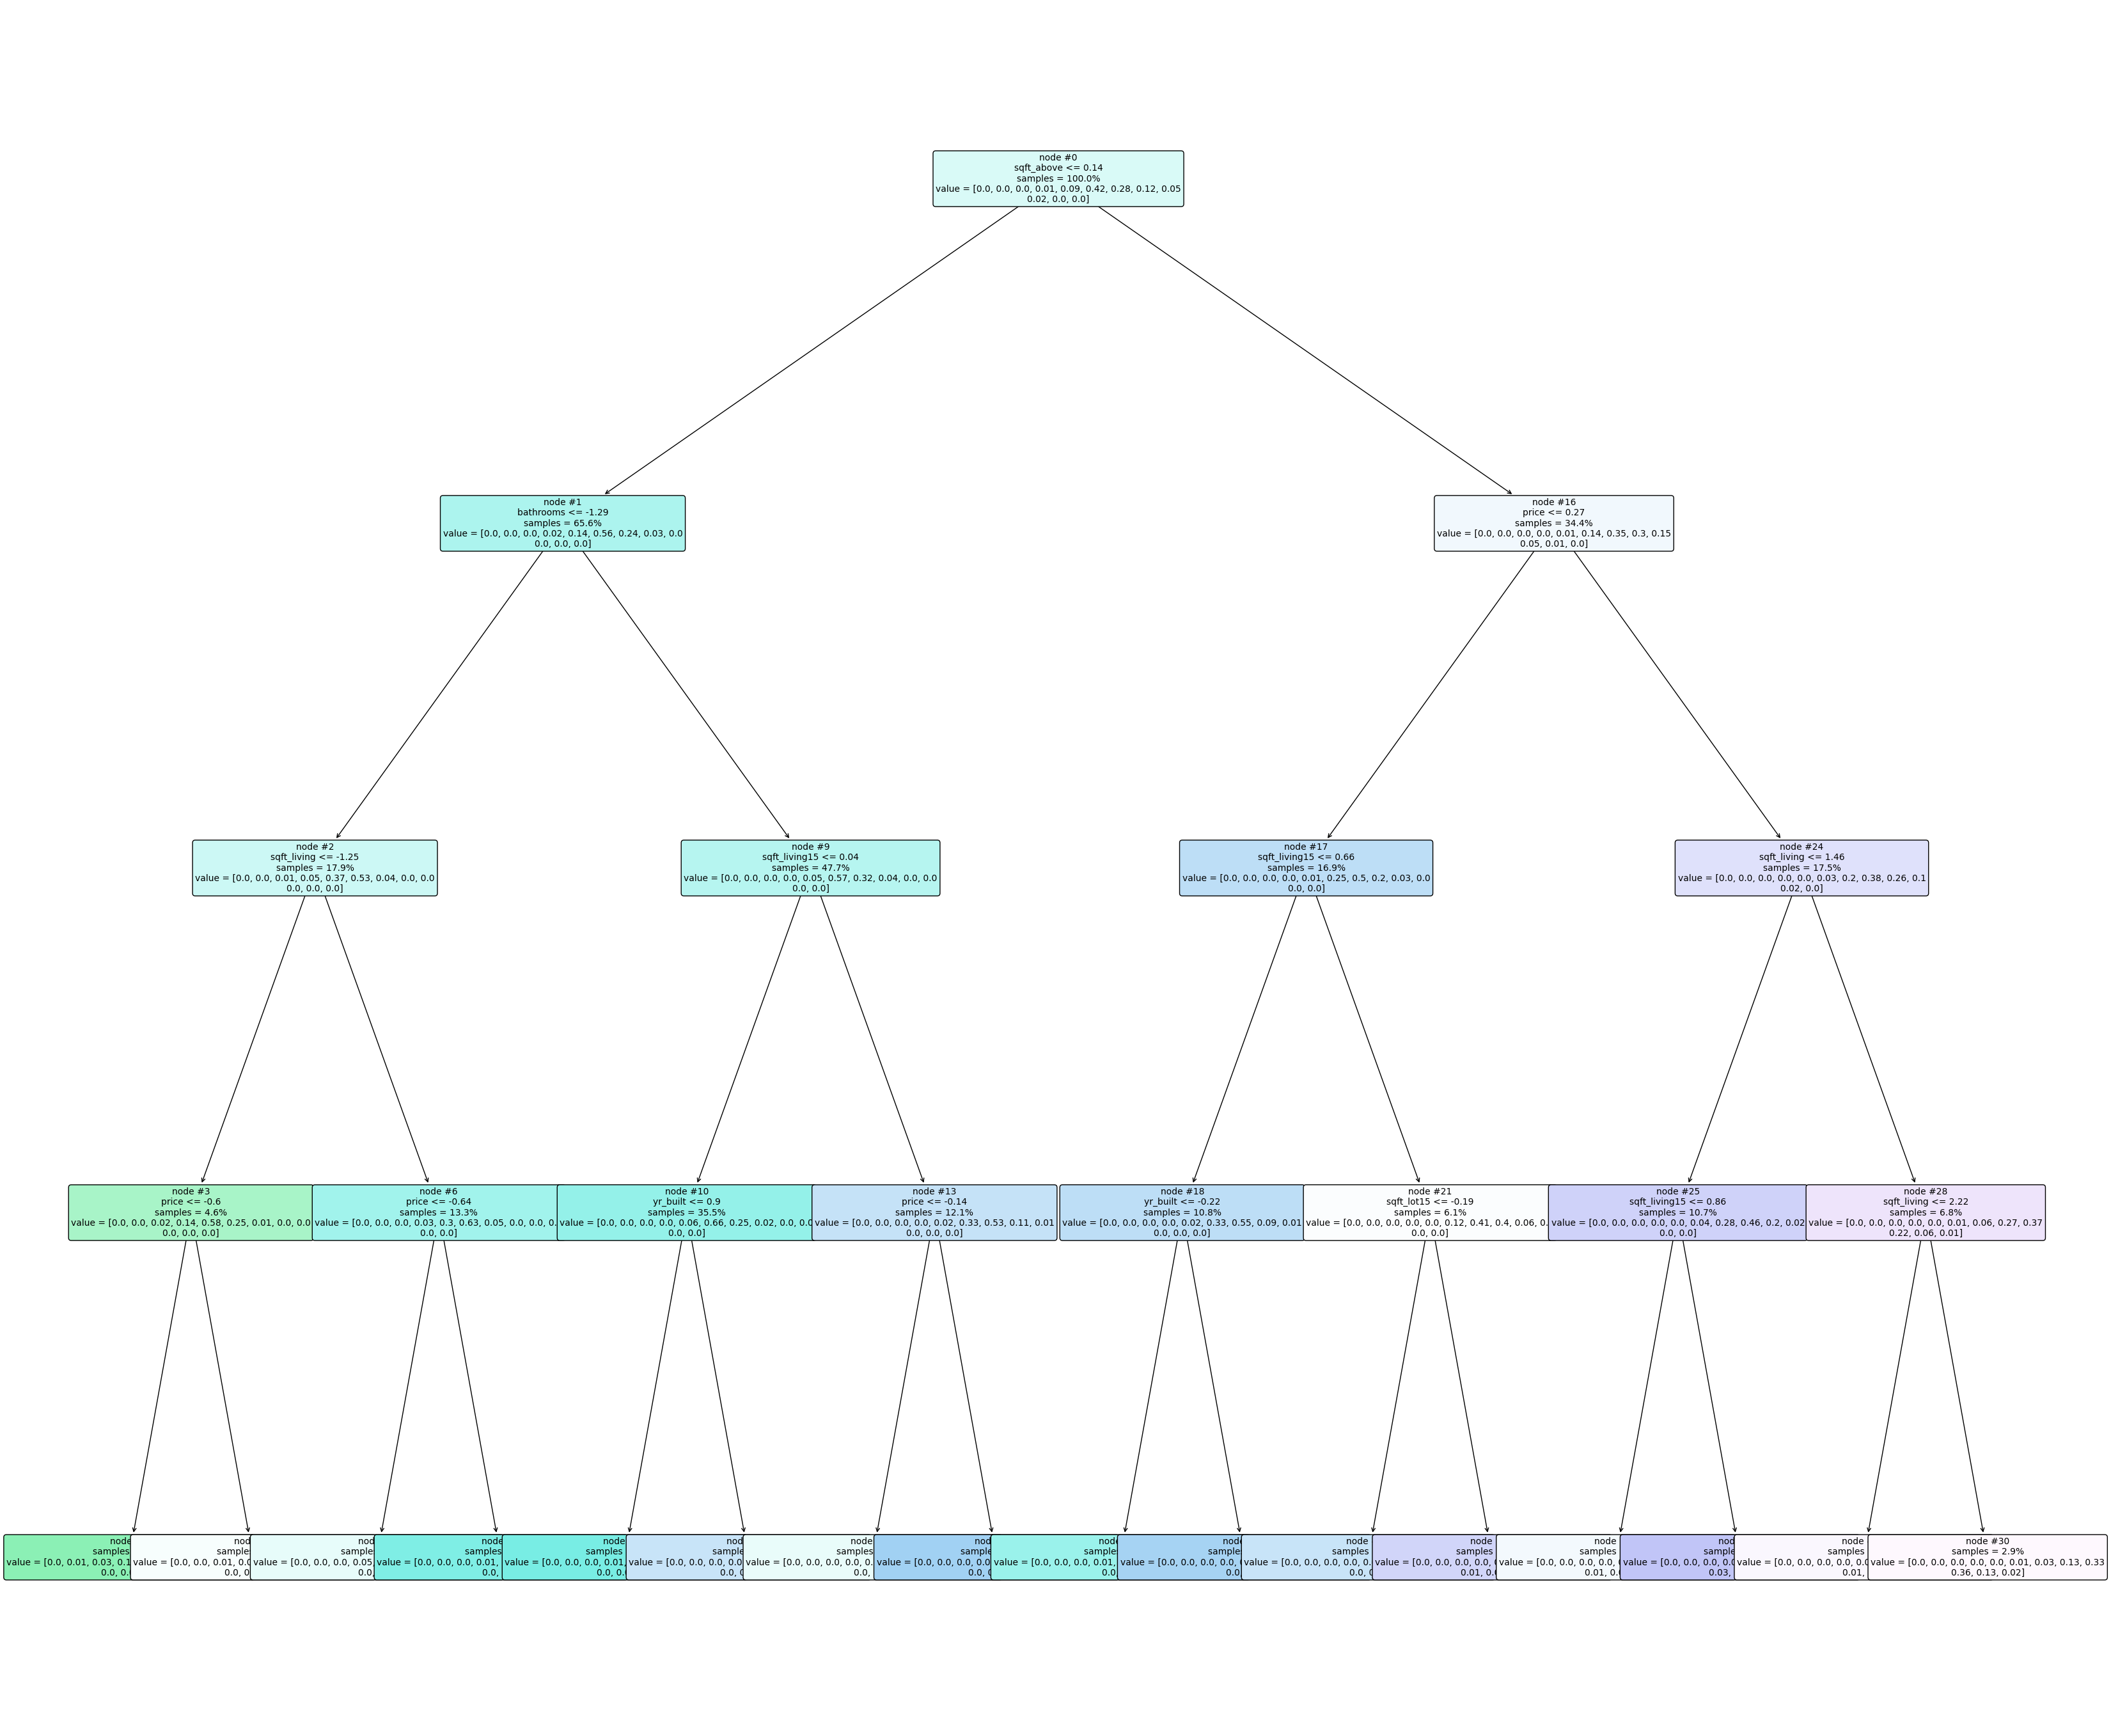


Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    2    5    0    0    0    0    0    0]
 [   0    0    0    0   23   23    0    0    0    0    0    0]
 [   0    0    0    0   93  330    5    0    0    0    0    0]
 [   0    0    0    0   22 1468  286   43    1    0    0    0]
 [   0    0    0    0    2  395  591  197    2    1    0    0]
 [   0    0    0    0    0   27  133  319   32    9    0    0]
 [   0    0    0    0    0    1   16  137   29   36    0    0]
 [   0    0    0    0    0    0    0   26    3   44    0    0]
 [   0    0    0    0    0    0    0    3    1   17    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]]

Precisión Global:
0.5884802220680083

Error Global:
0.4115197779319917

Precisión por categoría:
   1    3    4    5        6         7         8         9        10       11  \
0 NaN  0.0  0.0  0.0  0.21729  0.806593  0

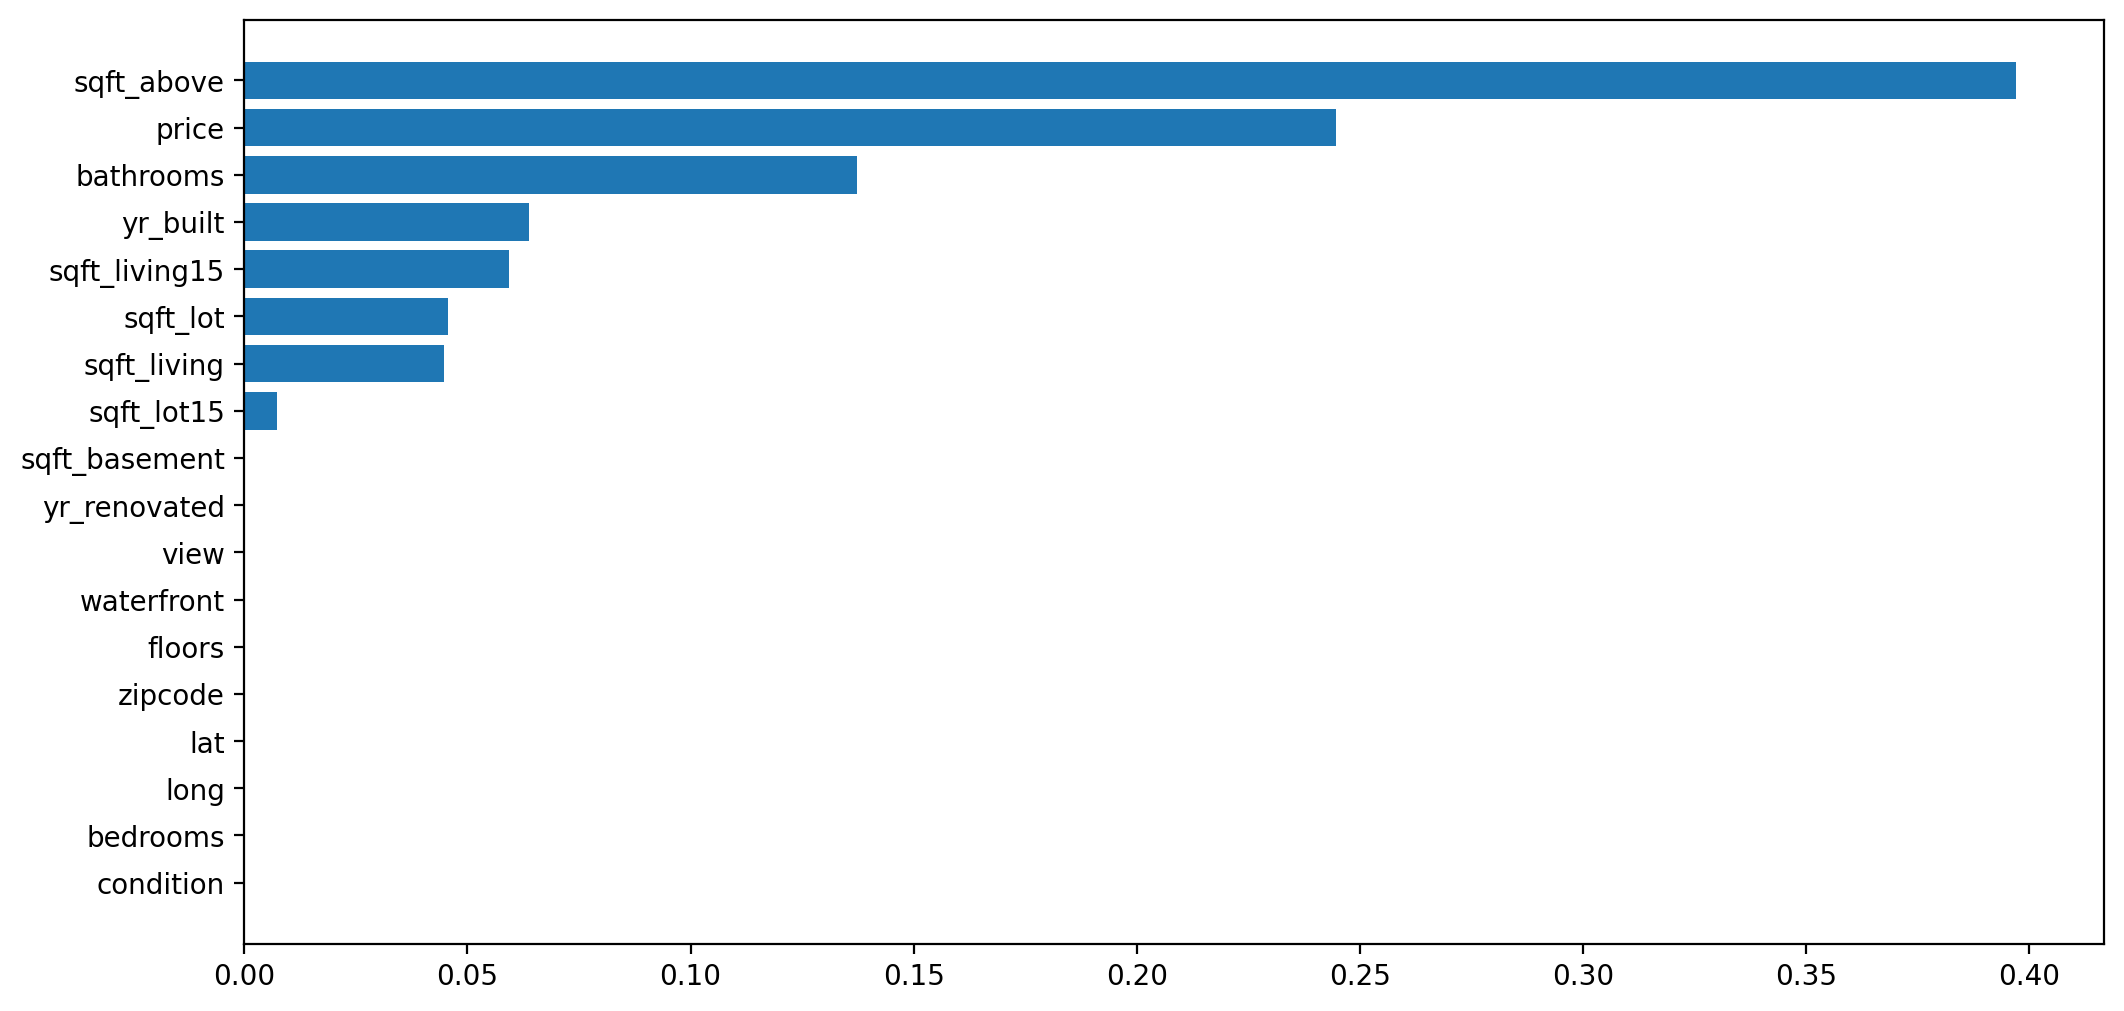

In [ ]:
p.DecisionTree('grade', ss=2, md=4)

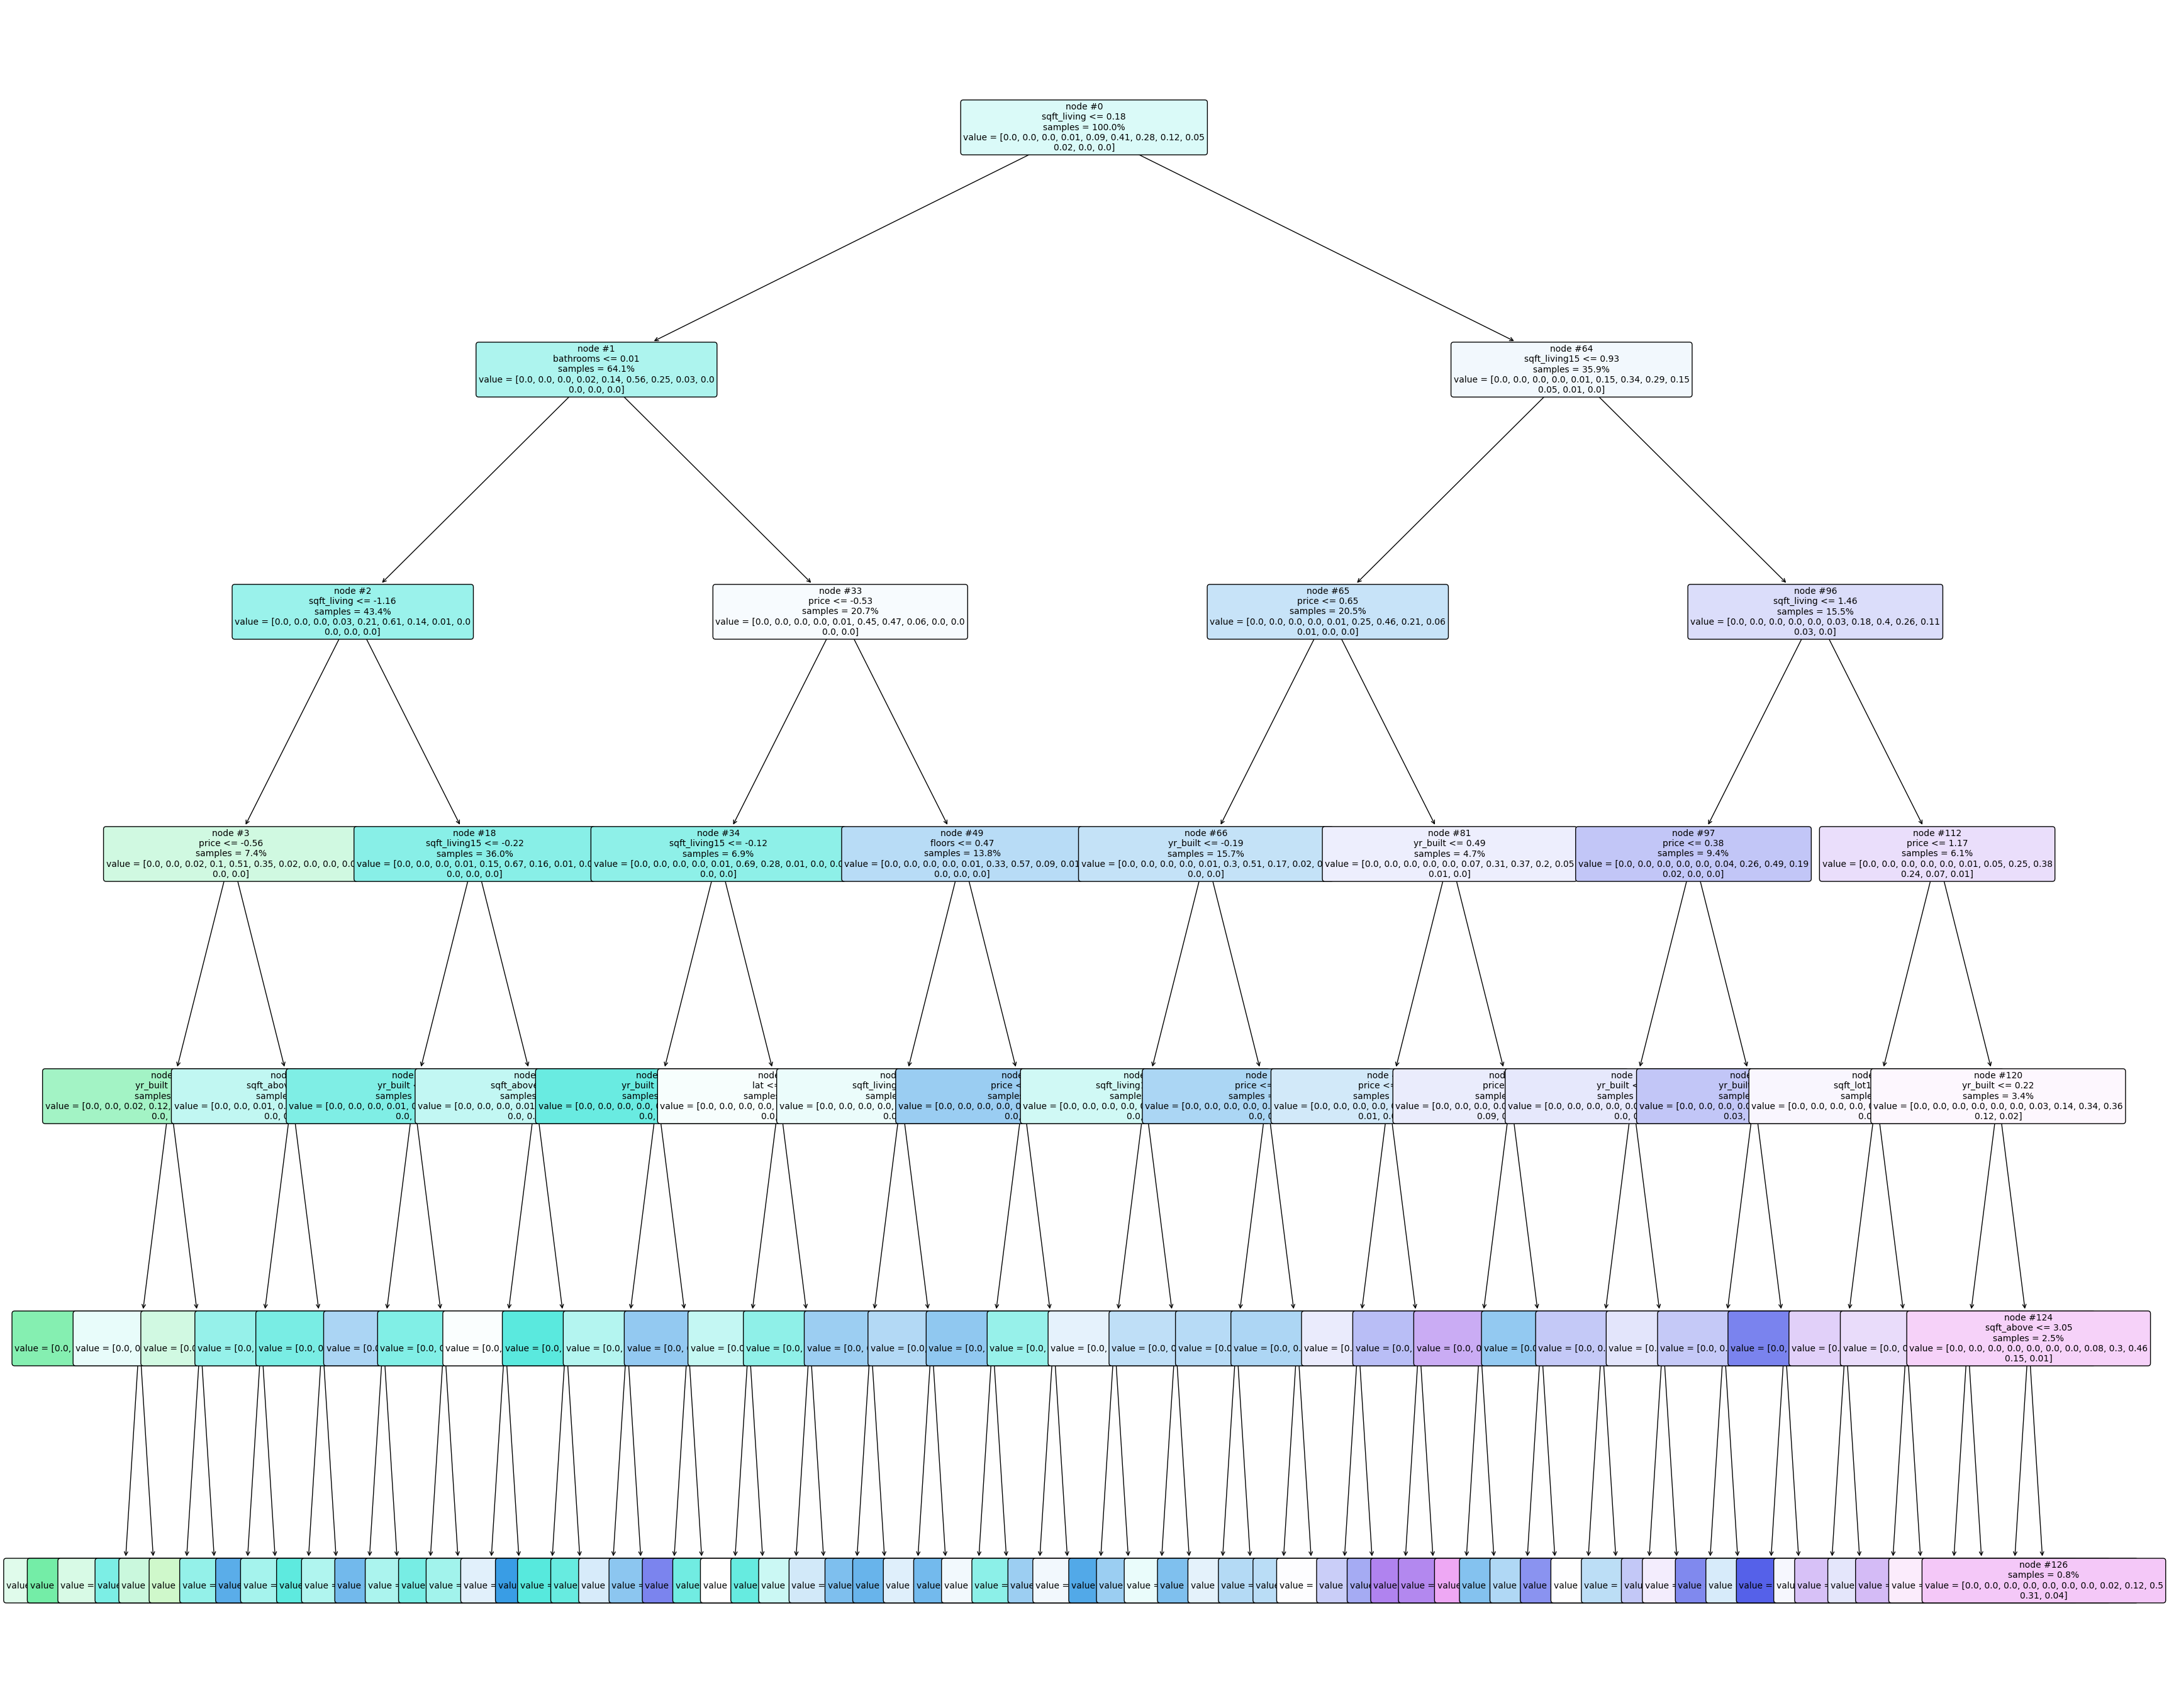


Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1    3    0    0    0    0    0    0    0]
 [   0    0    0    0   32    8    0    0    0    0    0    0]
 [   0    0    0    1  187  238    5    0    0    0    0    0]
 [   0    0    0    0   59 1479  259   15    2    0    0    0]
 [   0    0    0    0    1  444  646  125   11    0    0    0]
 [   0    0    0    0    0   28  149  256   67    3    0    0]
 [   0    0    0    0    0    1   16   85  104    6    0    0]
 [   0    0    0    0    0    0    0   10   45   17    2    1]
 [   0    0    0    0    0    0    0    1    5   10    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0]]

Precisión Global:
0.6220217441591488

Error Global:
0.3779782558408512

Precisión por categoría:
   1   3    4    5         6         7         8         9         10  \
0 NaN NaN  0.0  0.0  0.433875  0.815325  0.526487 

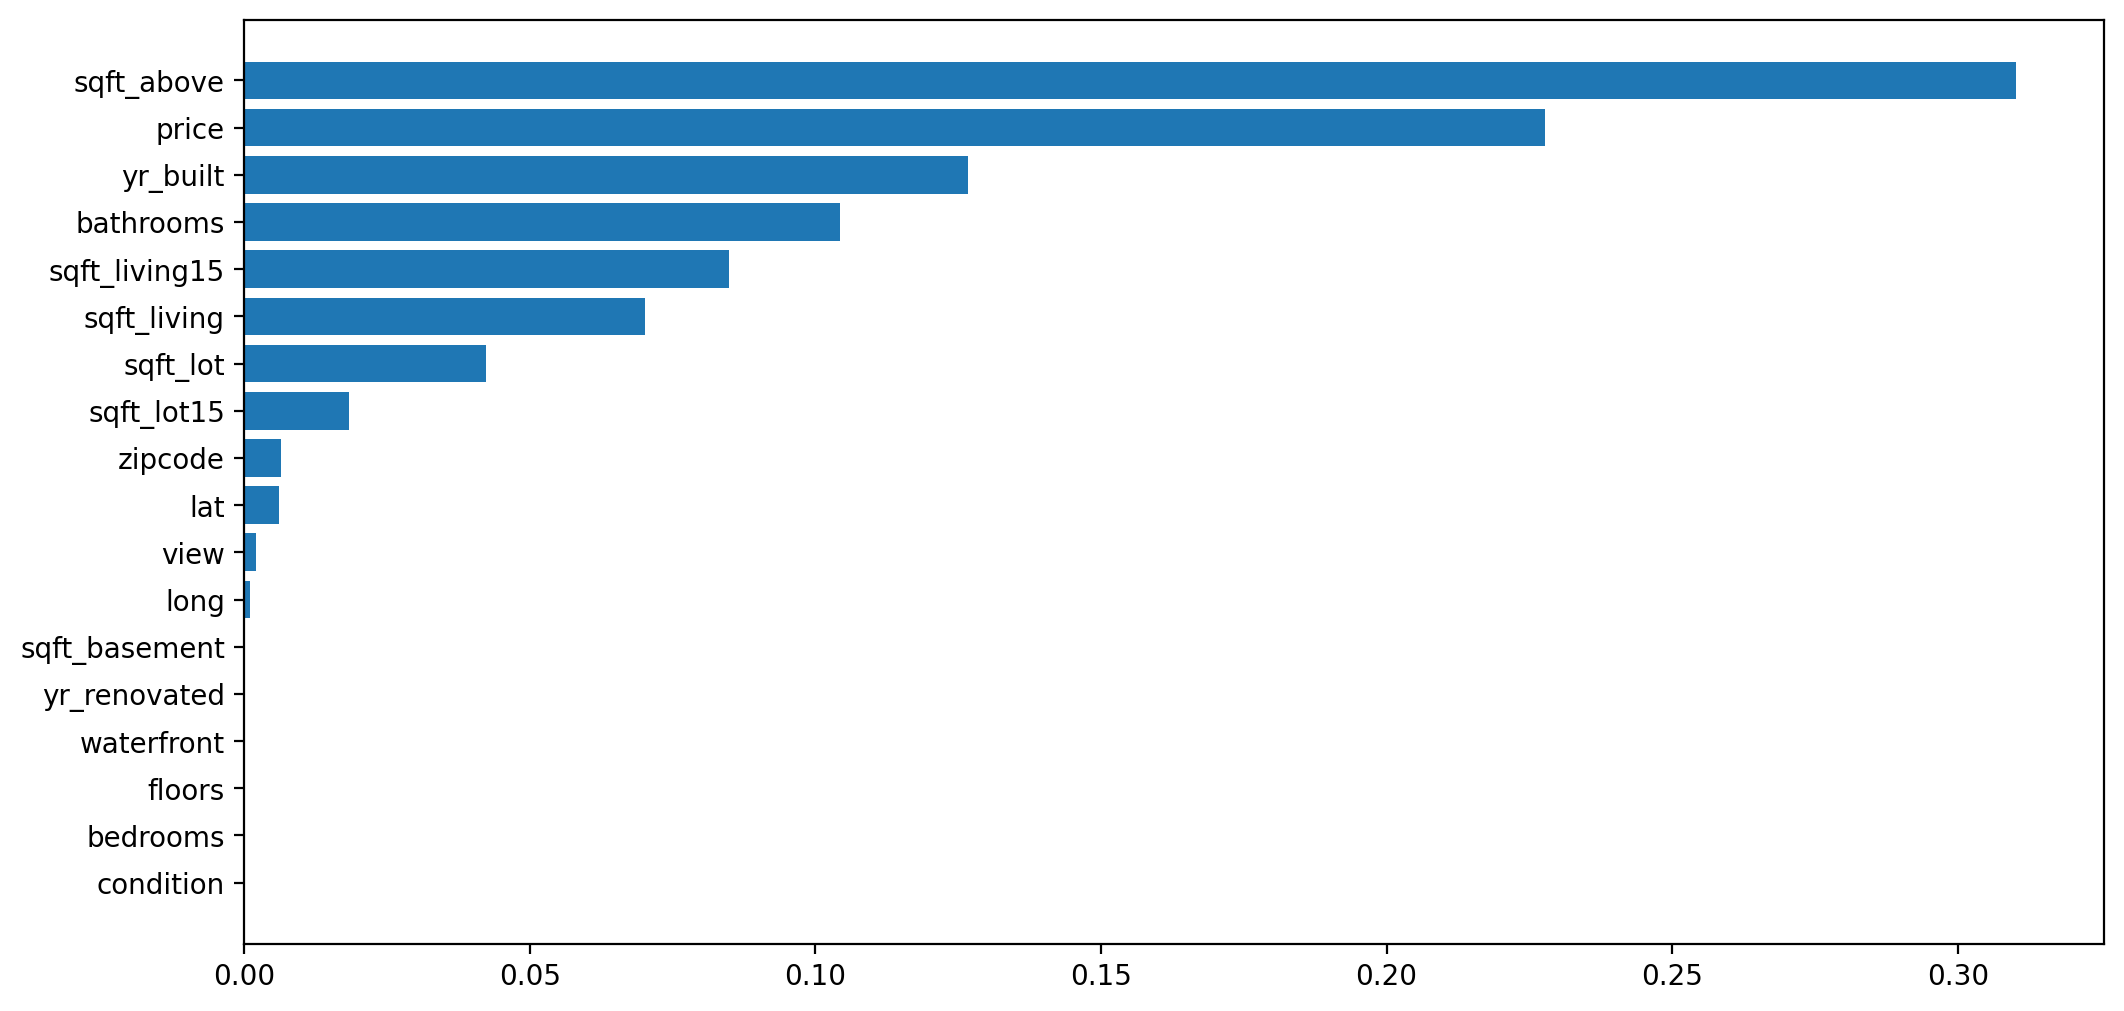

In [ ]:
p.DecisionTree('grade', ss=4, md=6)

### Random Forest


Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1    4    0    0    0    0    0    0    0]
 [   0    0    1    3   37   10    0    0    0    0    0    0]
 [   0    0    0    3  225  194    8    0    0    0    0    0]
 [   0    0    0    2   79 1438  255    8    1    0    0    0]
 [   0    0    0    0    2  255  850  106   12    1    0    0]
 [   0    0    0    0    0   10  185  263   42    2    0    0]
 [   0    0    0    0    0    4   24   72  112   15    0    0]
 [   0    0    0    0    0    0    2   11   34   32    1    0]
 [   0    0    0    0    0    0    0    0    4    8    4    0]
 [   0    0    0    0    0    0    0    0    1    1    1    0]]

Precisión Global:
0.6770761045570206

Error Global:
0.3229238954429794

Precisión por categoría:
   1   3    4         5         6         7         8         9         10  \
0 NaN NaN  0.0  0.058824  0.523256  0.806506 

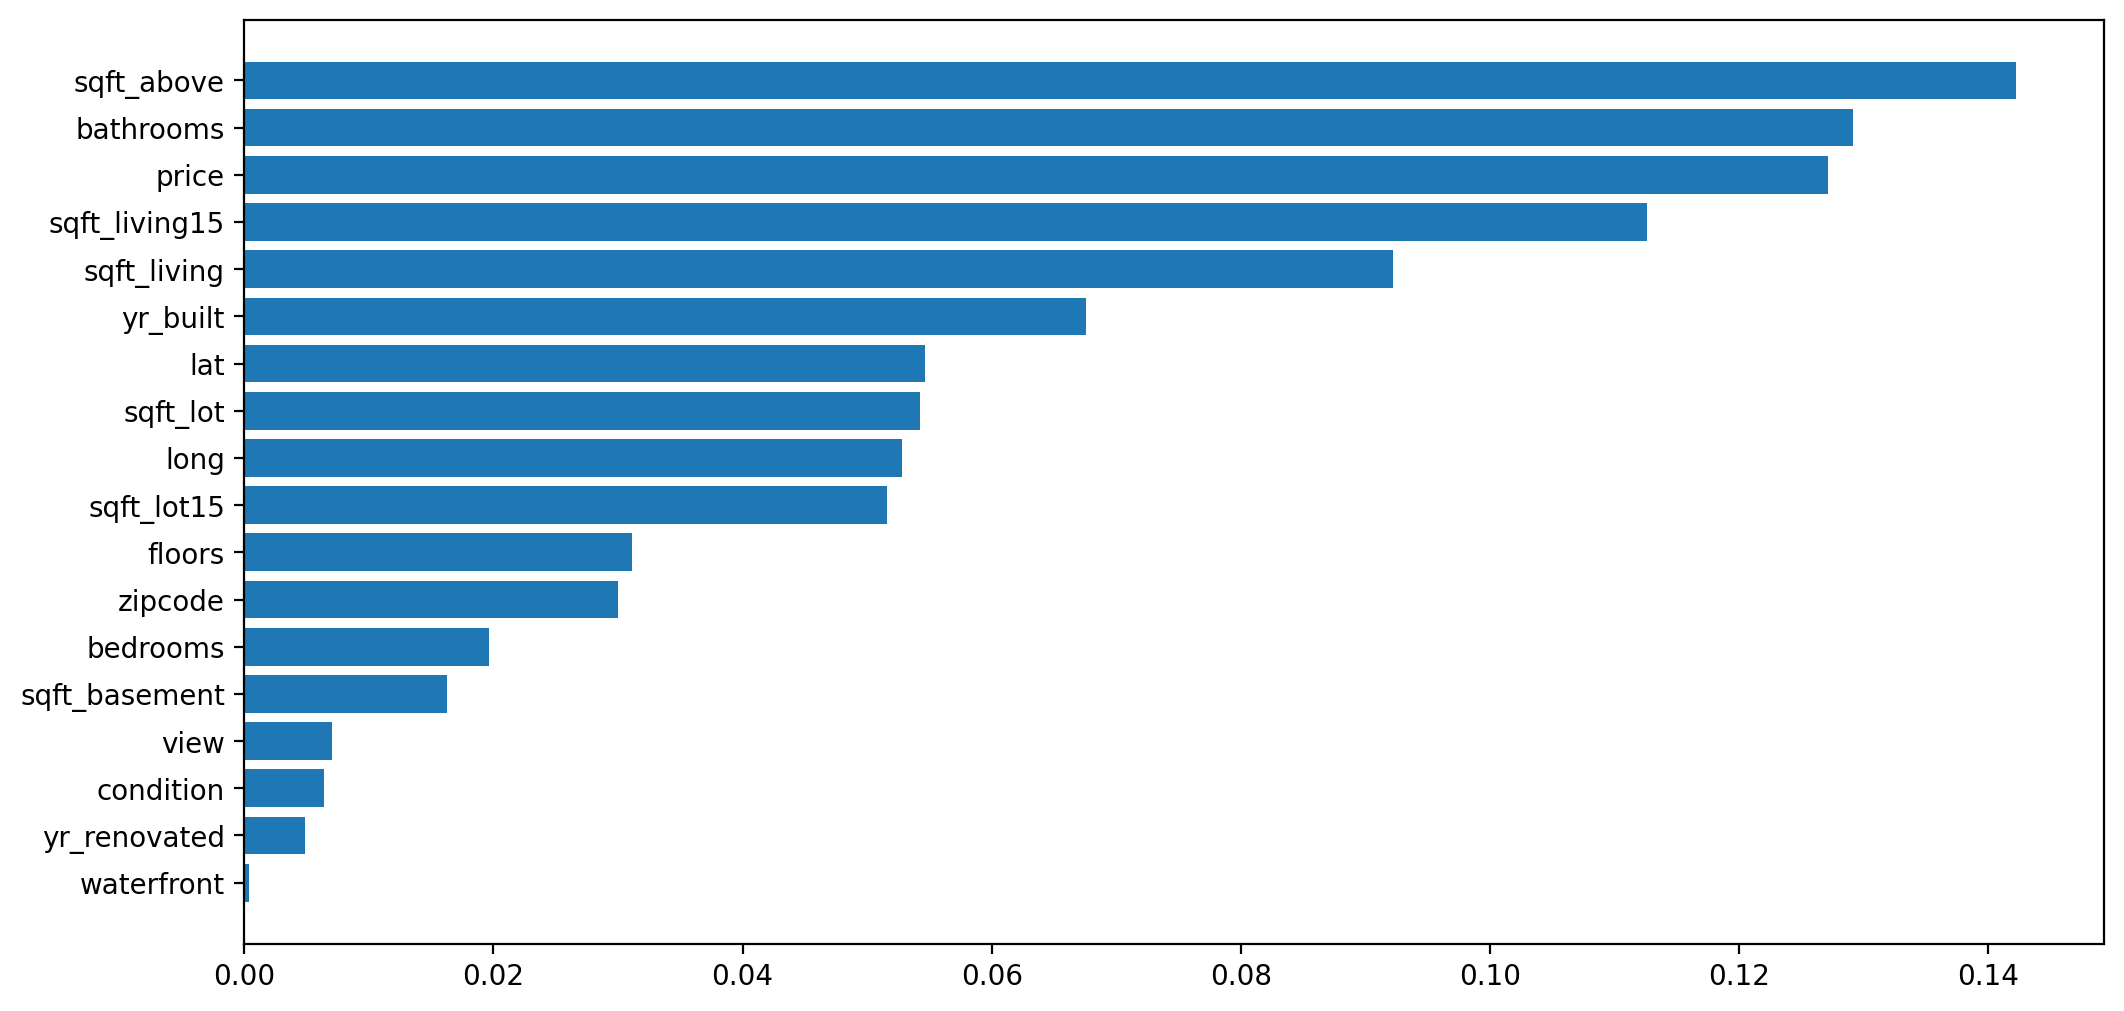

In [ ]:
p.Randomforest(n_estimators=5, criterion='gini', min_samples_split=27, target='grade')


Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    3    1    0    0    0    0    0    0    0]
 [   0    0    0   10   42    6    0    0    0    0    0    0]
 [   0    0    0    5  223  191    2    0    0    0    0    0]
 [   0    0    0    0   77 1503  191    9    1    0    0    0]
 [   0    0    0    0    0  253  905  102    0    0    0    0]
 [   0    0    0    0    0    4  145  304   36    2    0    0]
 [   0    0    0    0    0    0   16   85  105   18    0    0]
 [   0    0    0    0    0    0    1    9   27   28    3    0]
 [   0    0    0    0    0    0    0    0    2    8    3    0]
 [   0    0    0    0    0    0    0    0    0    0    1    1]]

Precisión Global:
0.7129308350682396

Error Global:
0.2870691649317604

Precisión por categoría:
   1    3    4         5         6         7         8         9        10  \
0 NaN  0.0  0.0  0.172414  0.529691  0.843908

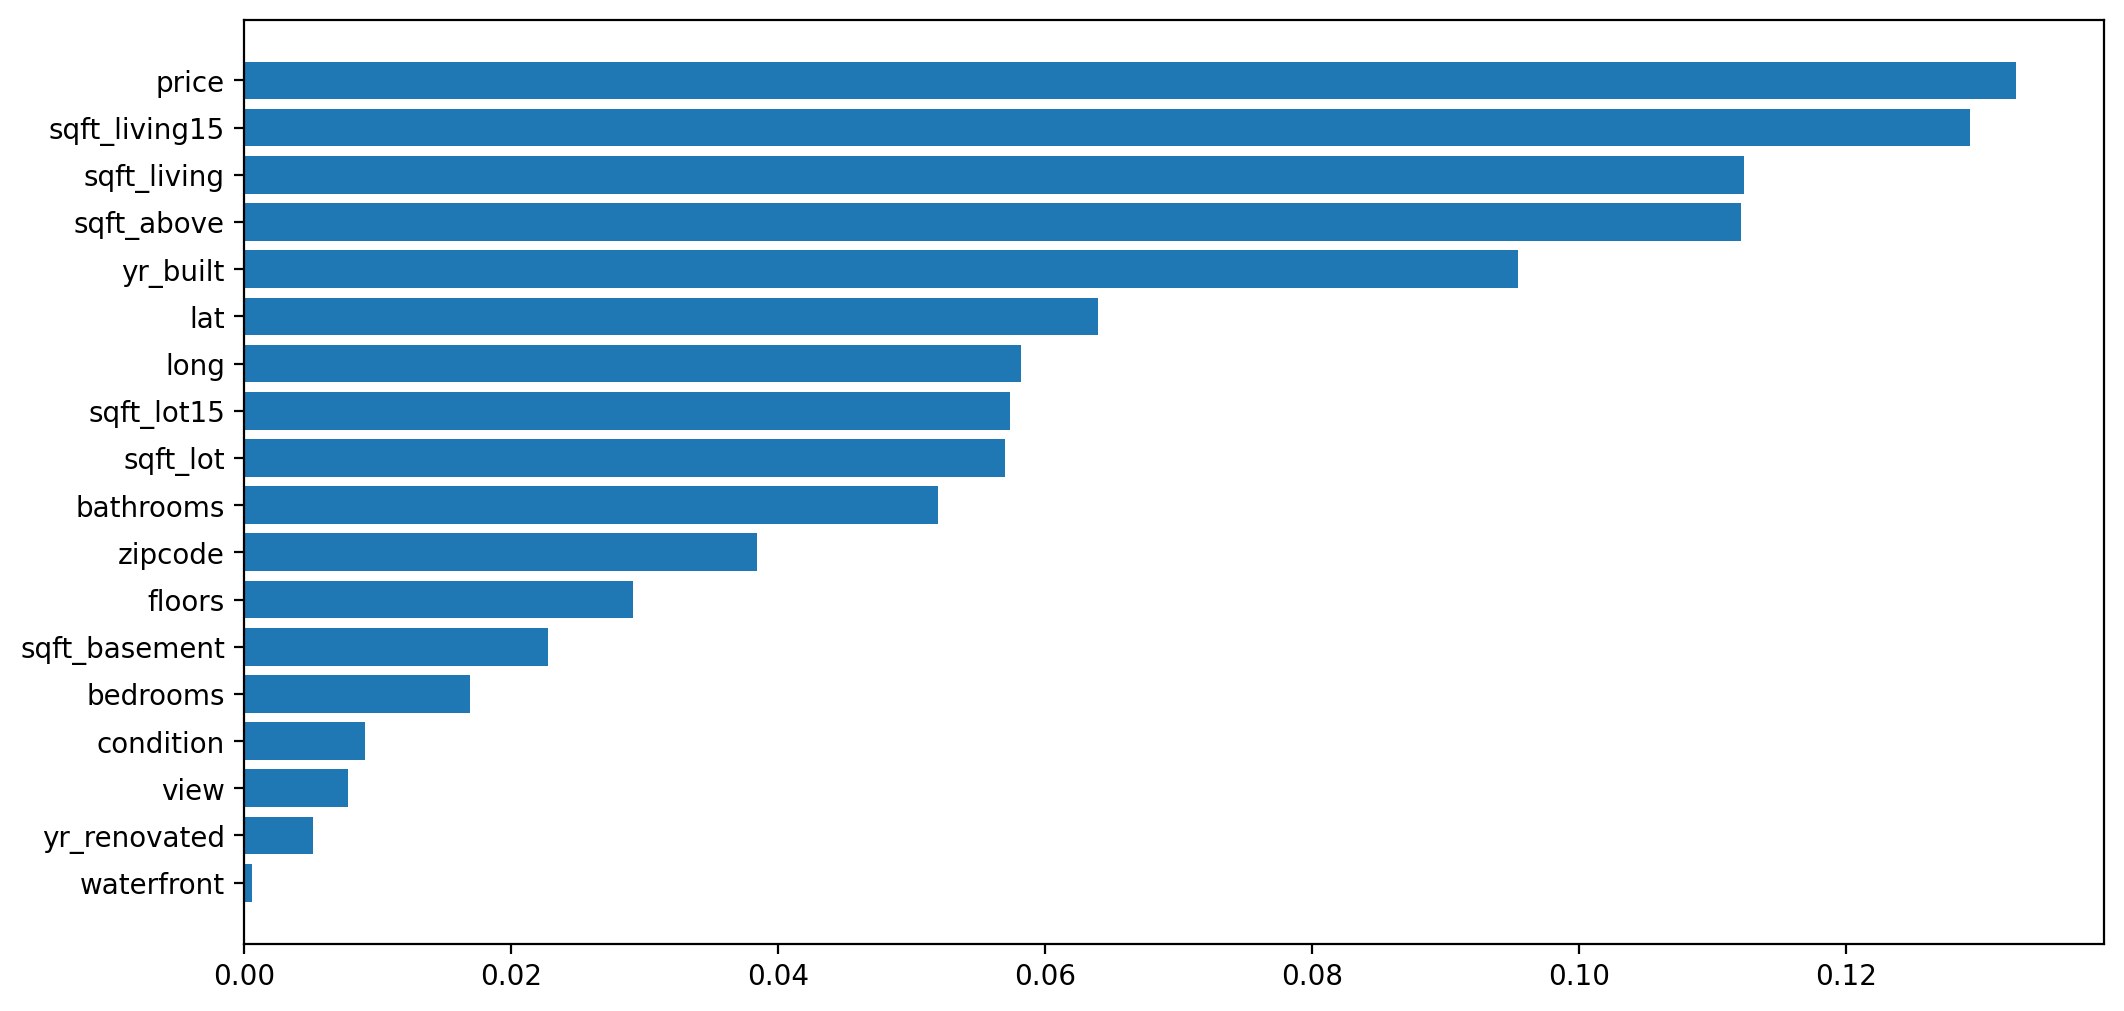

In [ ]:
p.Randomforest(n_estimators=200, criterion='gini', min_samples_split=10, target='grade')

### XG Boost


Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    2    2    0    0    0    0    0    0    0]
 [   0    1    0    3   29   17    0    0    0    0    0    0]
 [   0    0    4    5  131  246   10    1    0    0    0    0]
 [   0    0    2    0   63 1390  276   32    1    0    0    0]
 [   0    0    0    0    4  433  606  179   12    1    0    0]
 [   0    0    0    0    1   31  158  267   62    4    0    0]
 [   0    0    0    0    0    2   20  108   77   27    2    0]
 [   0    0    0    0    0    0    1   18   33   35    2    0]
 [   0    0    0    0    0    0    0    0    6   12    2    1]
 [   0    0    0    0    0    0    0    0    0    3    0    0]]

Precisión Global:
0.5808466342817488

Error Global:
0.41915336571825124

Precisión por categoría:
   1    3    4     5         6         7         8         9         10  \
0 NaN  0.0  0.0  0.06  0.329975  0.787982  0.49

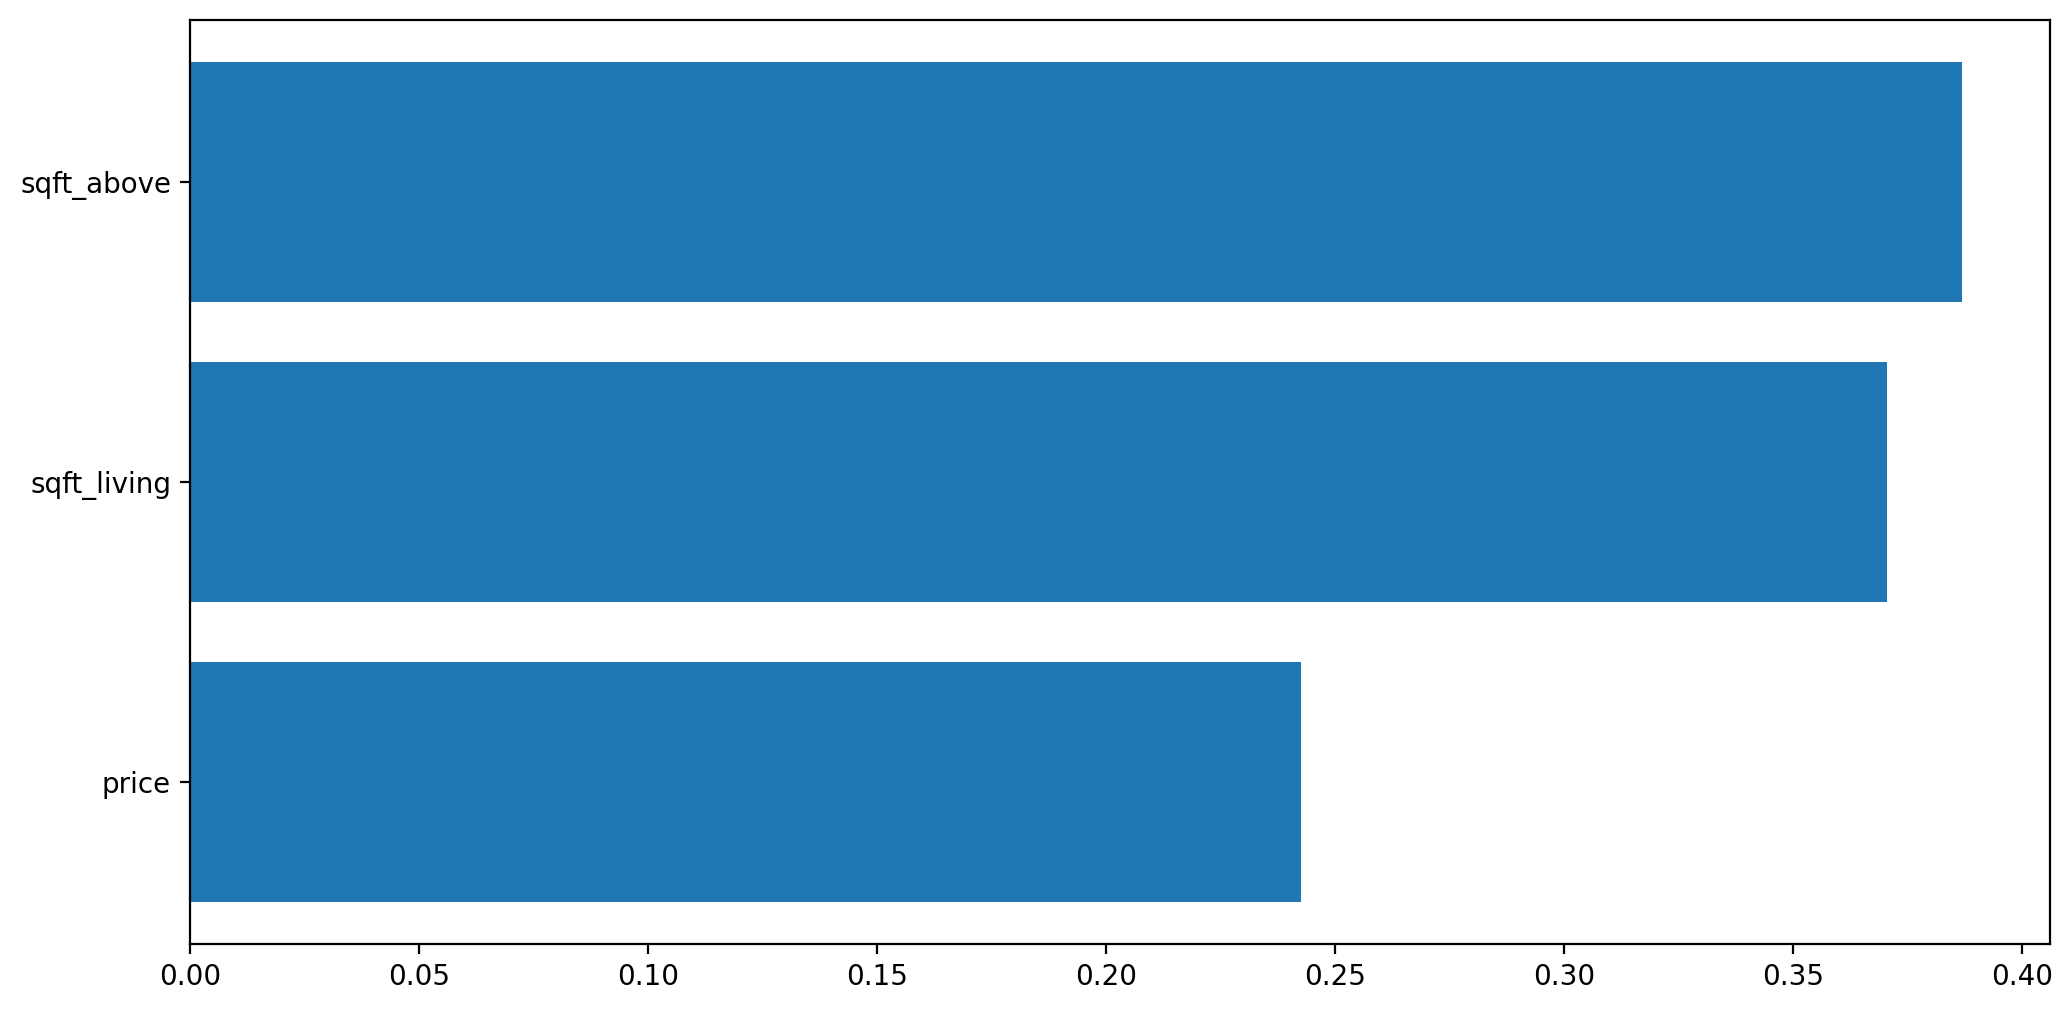

In [ ]:
p.XGBoosting('grade', ["price","sqft_living", "sqft_above"], n_estimators = 100, min_samples_split = 2)


Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    2    5    1    0    0    0    0    0    0    0]
 [   0    0    3    8   32    9    0    0    0    0    0    0]
 [   0    0    4    6  186  210    8    0    0    0    0    0]
 [   0    0    3    0   82 1413  295   25    5    0    1    0]
 [   0    0    2    0    2  255  802  120    8    3    1    0]
 [   0    0    0    0    0   12  183  268   42    1    1    0]
 [   0    0    0    0    0    1   16   90  101   17    2    0]
 [   0    0    0    0    0    0    0    7   24   42    4    2]
 [   0    0    0    0    0    0    0    1    1    8    4    2]
 [   0    0    0    0    0    0    0    0    1    2    0    0]]

Precisión Global:
0.6537126995142263

Error Global:
0.3462873004857737

Precisión por categoría:
   1   3     4         5         6         7         8       9         10  \
0 NaN NaN  0.25  0.153846  0.449275  0.774671 

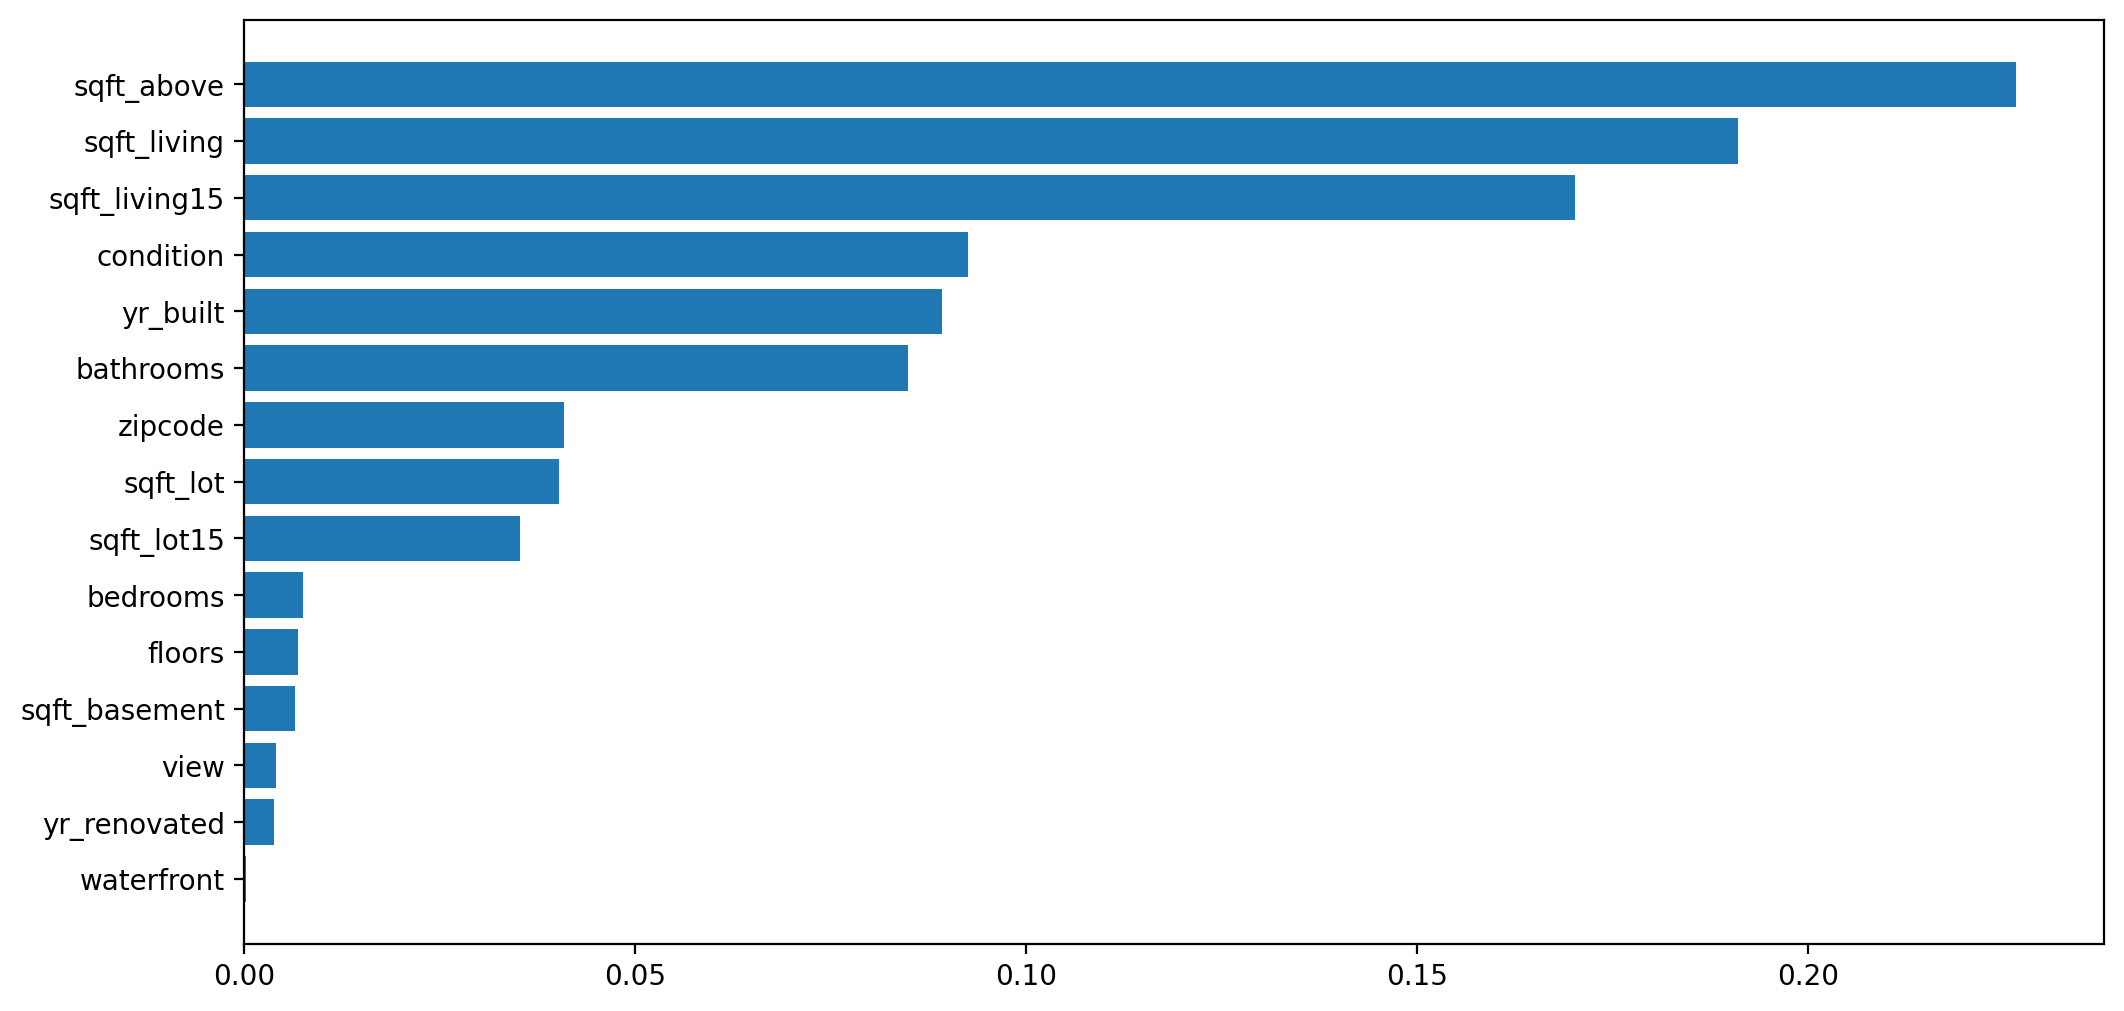

In [ ]:
p.XGBoosting('grade', ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], n_estimators = 100, min_samples_split = 9)

### ADA Boost


Matriz de Confusión:
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    0    1    0    3    2    0    0    0    0    0    0]
 [   0    0    1    9   20   19    0    0    0    0    0    0]
 [   0    0    0   17  150  204   24    1    0    0    0    0]
 [   0    0    1   20  185 1055  430   57    8    1    0    0]
 [   0    0    0    0   19  431  579  167   40    7    0    0]
 [   0    0    0    0    0   52  177  184   89   22    0    0]
 [   0    0    0    0    1    9   42   85   70   29    4    0]
 [   0    0    0    0    0    2    6   12   31   30    7    1]
 [   0    0    0    0    0    0    0    0    5    6    6    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0]]

Precisión Global:
0.4820726347443905

Error Global:
0.5179273652556096

Precisión por categoría:
   1    3         4         5         6         7         8         9   \
0 NaN  0.0  0.166667  0.183673  0.378788  0.60045

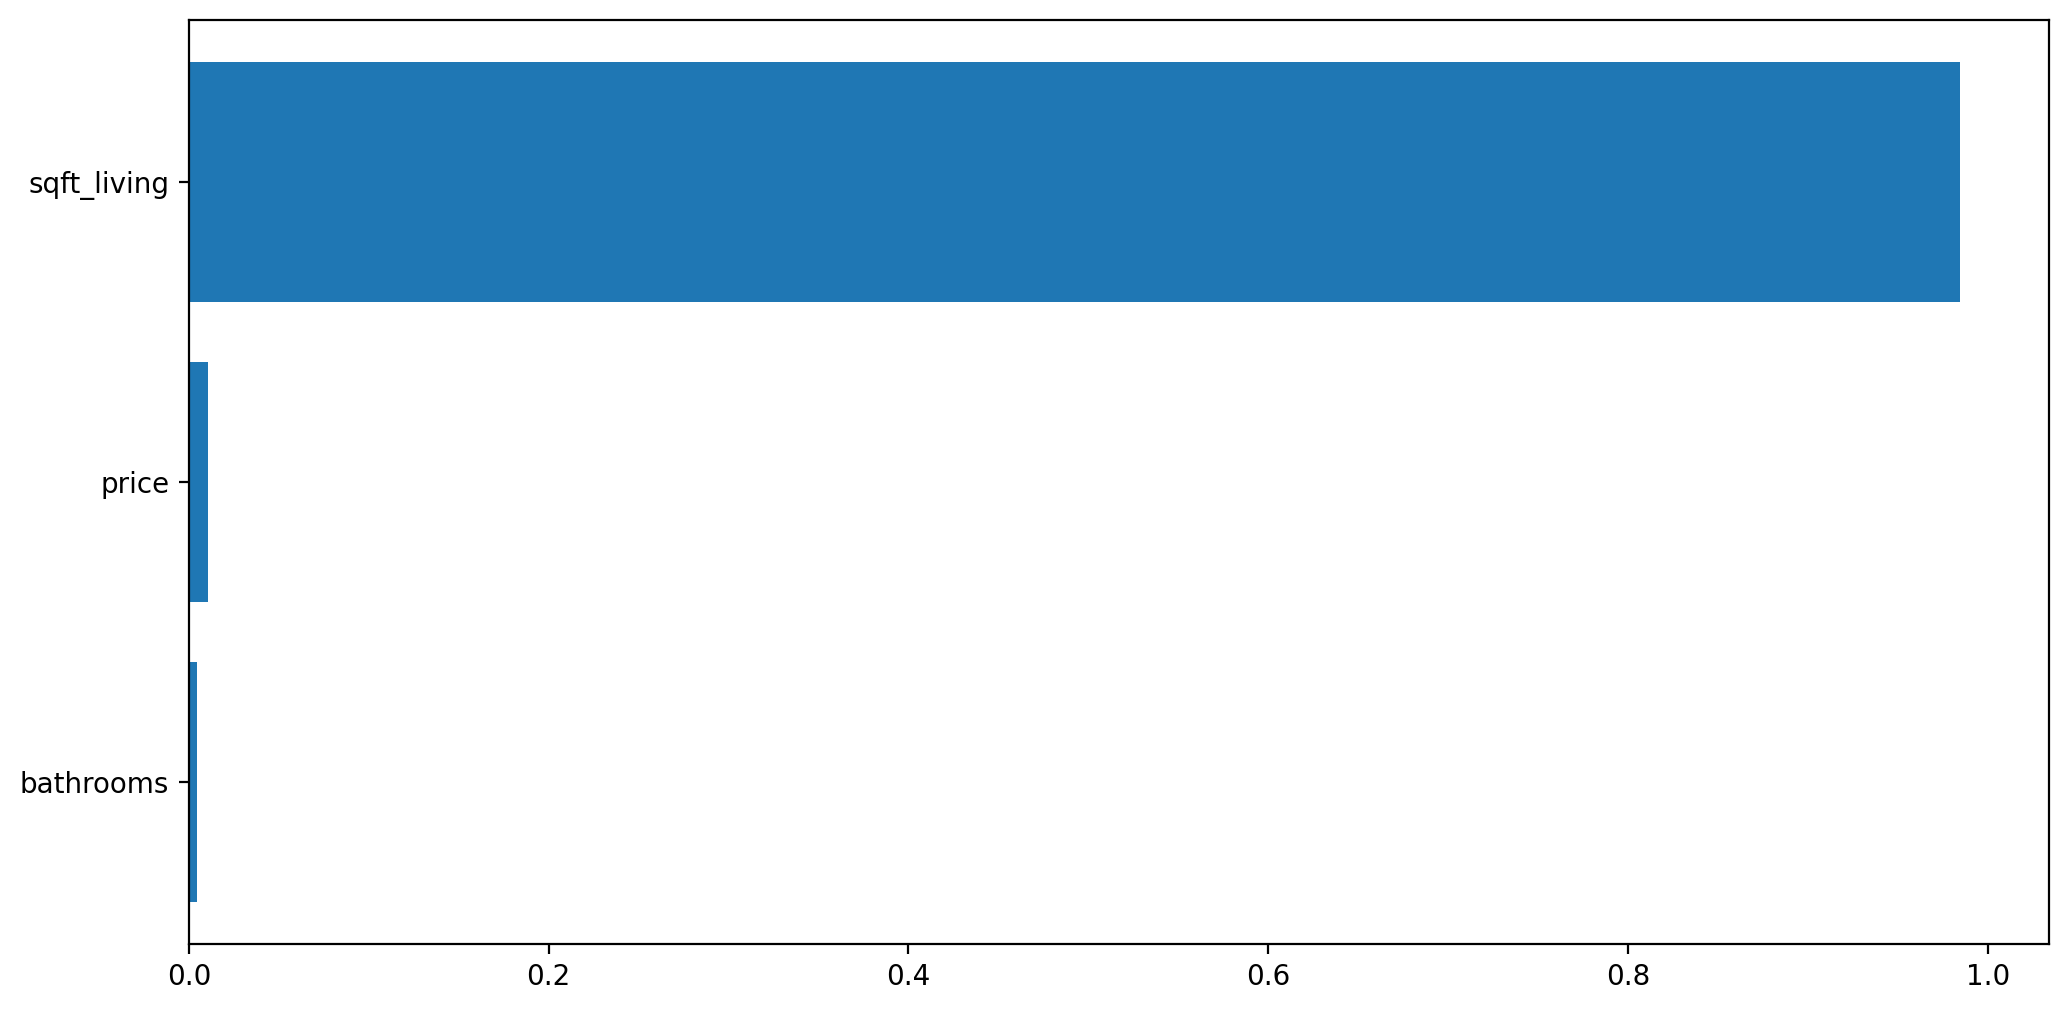

In [ ]:
p.ADABoosting('grade', ["price", "bathrooms", "sqft_living"], min_samples_split = 3, max_depth = None, criterion = "gini", n_estimators= 100)

## Benchmark
### The model that perfoms best is the Random Forest with the following metrics:
* Global Precision: 0.712


The other algorithms seem to perform well and similiar except for the ADA Boost which does not even pass the 0.5 umbral of global precision

In [ ]:
clasificacion = {'Algoritmo': ['Decision Tree', 'Decision Tree','Random Forest', 'Random Forest','XG Boost','XG Boost', 'ADA Boost'],
        'Parámetros': ['min_sample_splits=2, max_depth=4', 'min_sample_splits=4, max_depth=6', 'n_estimators=5, criterion="gini", min_samples_split=27', 'n_estimators=200, criterion="gini", min_samples_split=10', '["price","sqft_living", "sqft_above"], n_estimators = 100, min_samples_split = 2', '[bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, sqft_living15, sqft_lot15], n_estimators = 100, min_samples_split = 9', '["price", "bathrooms", "sqft_living"], min_samples_split = 3, max_depth = None, criterion = "gini", n_estimators= 100'],
        'Presición global': [0.588, 0.622, 0.677, 0.712, 0.580, 0.653, 0.482]
        }

df = pd.DataFrame(clasificacion)

df

Algoritmo                                         Parámetros  \
0  Decision Tree                   min_sample_splits=2, max_depth=4   
1  Decision Tree                   min_sample_splits=4, max_depth=6   
2  Random Forest  n_estimators=5, criterion="gini", min_samples_...   
3  Random Forest  n_estimators=200, criterion="gini", min_sample...   
4       XG Boost  ["price","sqft_living", "sqft_above"], n_estim...   
5       XG Boost  [bedrooms, bathrooms, sqft_living, sqft_lot, f...   
6      ADA Boost  ["price", "bathrooms", "sqft_living"], min_sam...   

   Presición global  
0             0.588  
1             0.622  
2             0.677  
3             0.712  
4             0.580  
5             0.653  
6             0.482

## Hypothesis Testing
### Does the choice of classification model significantly impact the global precision?

In [ ]:
precision_global = [0.6312745778394634, 0.590793430488087, 0.6759195003469812, 0.7126995142262318, 0.5836224843858432, 0.6500115660421004, 0.4906315058986815]

W, p_value = wilcoxon(precision_global)

print("Estadístico de prueba (W):", W)
print("Valor p:", p_value)

Estadístico de prueba (W): 0.0
Valor p: 0.015625


### Given the p-value of 0.015625, which is less than the significance level of 0.05, we reject the null hypothesis. This suggests that there is sufficient statistical evidence to conclude that there is a significant difference in global precision among the different classification models. In other words, the choice of classification model does impact the global precision.

## Regression
In this case, we utilize the variables to predict the price of a house based on certain characteristics

In [ ]:
p = P.AnalisisDatosExploratorio("house.csv")
p = R(p.df)

p.data_transform(0.8, 'price')

### Linear Simple Regression

In [ ]:
p.Linearsimple('sqft_living')

MSE: 67749231560.14077
MAE: 178882.7060043873
R^2: 0.47514244973457975


In [ ]:
p.Linearsimple('grade')

MSE: 73229181553.66428
MAE: 180043.38202150934
R^2: 0.43268893309764833


In [ ]:
p.Linearsimple('bathrooms')

MSE: 96942915483.0791
MAE: 208459.45004560536
R^2: 0.24897714757296574


### Linear Multiple Regression

#### Selected variables

In [ ]:
p.Linearmultiple(['bathrooms', 'sqft_living', 'sqft_above', 'grade', 'yr_built'])

MSE: 52665865422.46626
MAE: 152500.74928345374
R^2: 0.5919942341529562


#### All variables

In [ ]:
p.Linearmultiple(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

MSE: 38424657203.68189
MAE: 128126.77984182983
R^2: 0.7023217683021186


### Ridge Regression

In [ ]:
alphas = np.logspace(-10, 2, 200)
p.Ridge(alphas)

MSE: 38420423691.762825
MAE: 127980.57620134228
R^2: 0.7023545655847399


### Lasso Regression

In [ ]:
alphas = np.logspace(-6, 6, 200)
p.Lasso(alphas)

MSE: 38426812997.05761
MAE: 128104.40256206972
R^2: 0.7023050672354938


### Random Forest Regression

In [ ]:
p.Forestregressor(n_estimators=500, max_depth=4, min_samples_split=2, min_samples_leaf=5)

MSE: 36353801697.37188
MAE: 115244.66698879178
R^2: 0.7183648159200193


## Benchmark
### The model that perfoms best is the Random Forest Regression with the following metrics:
* MSE: 36353801697.37188
* MAE: 115244.66698879178
* R^2: 0.7183648159200193

Lasso Regression, Rigde Regression and Linear Multiple Regression with all the variables also come close to the Random Forest Regression with all first mentioned metrics being alike.

In [ ]:
clustering = {'Algoritmo': ['Simple', 'Simple','Simple', 'Multiple','Multiple', 'Rigde', 'Lasso', 'Random Forest'],
        'Variables': ['sqft_living','grade','bathrooms',"'bathrooms', 'sqft_living', 'sqft_above', 'grade', 'yr_built'", 'All variables','alphas = np.logspace(-10, 2, 200)','alphas = np.logspace(-6, 6, 200)','n_estimators=500, max_depth=4, min_samples_split=2, min_samples_leaf=5'],
        'MSE': [67749231560.14077, 73229181553.66428, 96942915483.0791, 52665865422.46626, 38424657203.68189, 38420423691.762825, 38426812997.05761, 36353801697.37188]
        }

df = pd.DataFrame(clustering)

df

Algoritmo                                          Variables  \
0         Simple                                        sqft_living   
1         Simple                                              grade   
2         Simple                                          bathrooms   
3       Multiple  'bathrooms', 'sqft_living', 'sqft_above', 'gra...   
4       Multiple                                      All variables   
5          Rigde                  alphas = np.logspace(-10, 2, 200)   
6          Lasso                   alphas = np.logspace(-6, 6, 200)   
7  Random Forest  n_estimators=500, max_depth=4, min_samples_spl...   

            MSE  
0  6.774923e+10  
1  7.322918e+10  
2  9.694292e+10  
3  5.266587e+10  
4  3.842466e+10  
5  3.842042e+10  
6  3.842681e+10  
7  3.635380e+10

## Hypothesis Testing
### Is there a significant difference in mean squared error (MSE) among different regression models used to predict house prices?

In [ ]:
mse = [66131024081.65169, 72289690996.75418, 95804377012.62404, 52260257642.4756, 39323633701.273796, 39321367206.55665, 39324015136.456696, 34025380631.94901]

W, p_value = wilcoxon(mse)

print("Estadístico de prueba (W):", W)
print("Valor p:", p_value)

Estadístico de prueba (W): 0.0
Valor p: 0.0078125


### The p-value of 0.0078125 suggests that there is statistically significant evidence to reject the null hypothesis at the 0.05 significance level.Therefore, we reject the null hypothesis and conclude that there is a significant difference in mean squared error (MSE) among different regression models used to predict house prices.